# Housekeeping:

In [2]:
sessionInfo()
options(repr.plot.width=14,repr.plot.antialias='subpixel',repr.plot.res=218)
update.packages()

R version 4.0.3 Patched (2020-10-12 r79333)
Platform: x86_64-apple-darwin17.0 (64-bit)
Running under: macOS Big Sur 10.16

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRblas.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRlapack.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

loaded via a namespace (and not attached):
 [1] compiler_4.0.3  ellipsis_0.3.1  IRdisplay_0.7.0 pbdZMQ_0.3-3   
 [5] tools_4.0.3     htmltools_0.5.0 pillar_1.4.6    base64enc_0.1-3
 [9] crayon_1.3.4    uuid_0.1-4      IRkernel_1.1.1  jsonlite_1.7.1 
[13] digest_0.6.25   lifecycle_0.2.0 repr_1.1.0      rlang_0.4.8    
[17] evaluate_0.14  

In [3]:
food <- read.csv("protein.csv", row.names=1)

Scale the data

In [4]:
xfood <- scale(food) 

In [5]:
head(food)
head(xfood)

RedMeat WhiteMeat Eggs Milk Fish Cereals Starch Nuts Fr.Veg
Albania        10.1     1.4      0.5   8.9 0.2  42.3    0.6    5.5  1.7   
Austria         8.9    14.0      4.3  19.9 2.1  28.0    3.6    1.3  4.3   
Belgium        13.5     9.3      4.1  17.5 4.5  26.6    5.7    2.1  4.0   
Bulgaria        7.8     6.0      1.6   8.3 1.2  56.7    1.1    3.7  4.2   
Czechoslovakia  9.7    11.4      2.8  12.5 2.0  34.3    5.0    1.1  4.0   
Denmark        10.6    10.8      3.7  25.0 9.9  21.9    4.8    0.7  2.4

RedMeat     WhiteMeat  Eggs       Milk        Fish       
Albania         0.08126490 -1.7584889 -2.1796385 -1.15573814 -1.20028213
Austria        -0.27725673  1.6523731  1.2204544  0.39237676 -0.64187467
Belgium         1.09707621  0.3800675  1.0415022  0.05460623  0.06348211
Bulgaria       -0.60590157 -0.5132535 -1.1954011 -1.24018077 -0.90638347
Czechoslovakia -0.03824231  0.9485445 -0.1216875 -0.64908235 -0.67126454
Denmark         0.23064892  0.7861225  0.6835976  1.11013912  1.65053488
               Cereals    Starch     Nuts       Fr.Veg     
Albania         0.9159176 -2.2495772  1.2227536 -1.35040507
Austria        -0.3870690 -0.4136872 -0.8923886  0.09091397
Belgium        -0.5146342  0.8714358 -0.4895043 -0.07539207
Bulgaria        2.2280161 -1.9435955  0.3162641  0.03547862
Czechoslovakia  0.1869740  0.4430614 -0.9931096 -0.07539207
Denmark        -0.9428885  0.3206688 -1.1945517 -0.96235764

Try k-means. It does something quite different from k nearest neighbors. (That said, clustering and factoring can be similar conceptually.)

K-means clustering with 3 clusters of sizes 6, 4, 15

Cluster means:
     RedMeat  WhiteMeat       Eggs       Milk       Fish    Cereals     Starch
1 -0.7901419 -0.5267887 -1.1655757 -0.9047559 -0.9504683  1.4383272 -0.7604664
2 -0.5088020 -1.1088009 -0.4124850 -0.8320414  0.9819154  0.1300253 -0.1842010
3  0.4517373  0.5063957  0.5762263  0.5837801  0.1183432 -0.6100043  0.3533068
        Nuts     Fr.Veg
1  0.8870168 -0.5373533
2  1.3108846  1.6292449
3 -0.7043759 -0.2195240

Clustering vector:
       Albania        Austria        Belgium       Bulgaria Czechoslovakia 
             1              3              3              1              3 
       Denmark      E Germany        Finland         France         Greece 
             3              3              3              3              2 
       Hungary        Ireland          Italy    Netherlands         Norway 
             1              3              2              3              3 
        Poland       Portugal        Romani

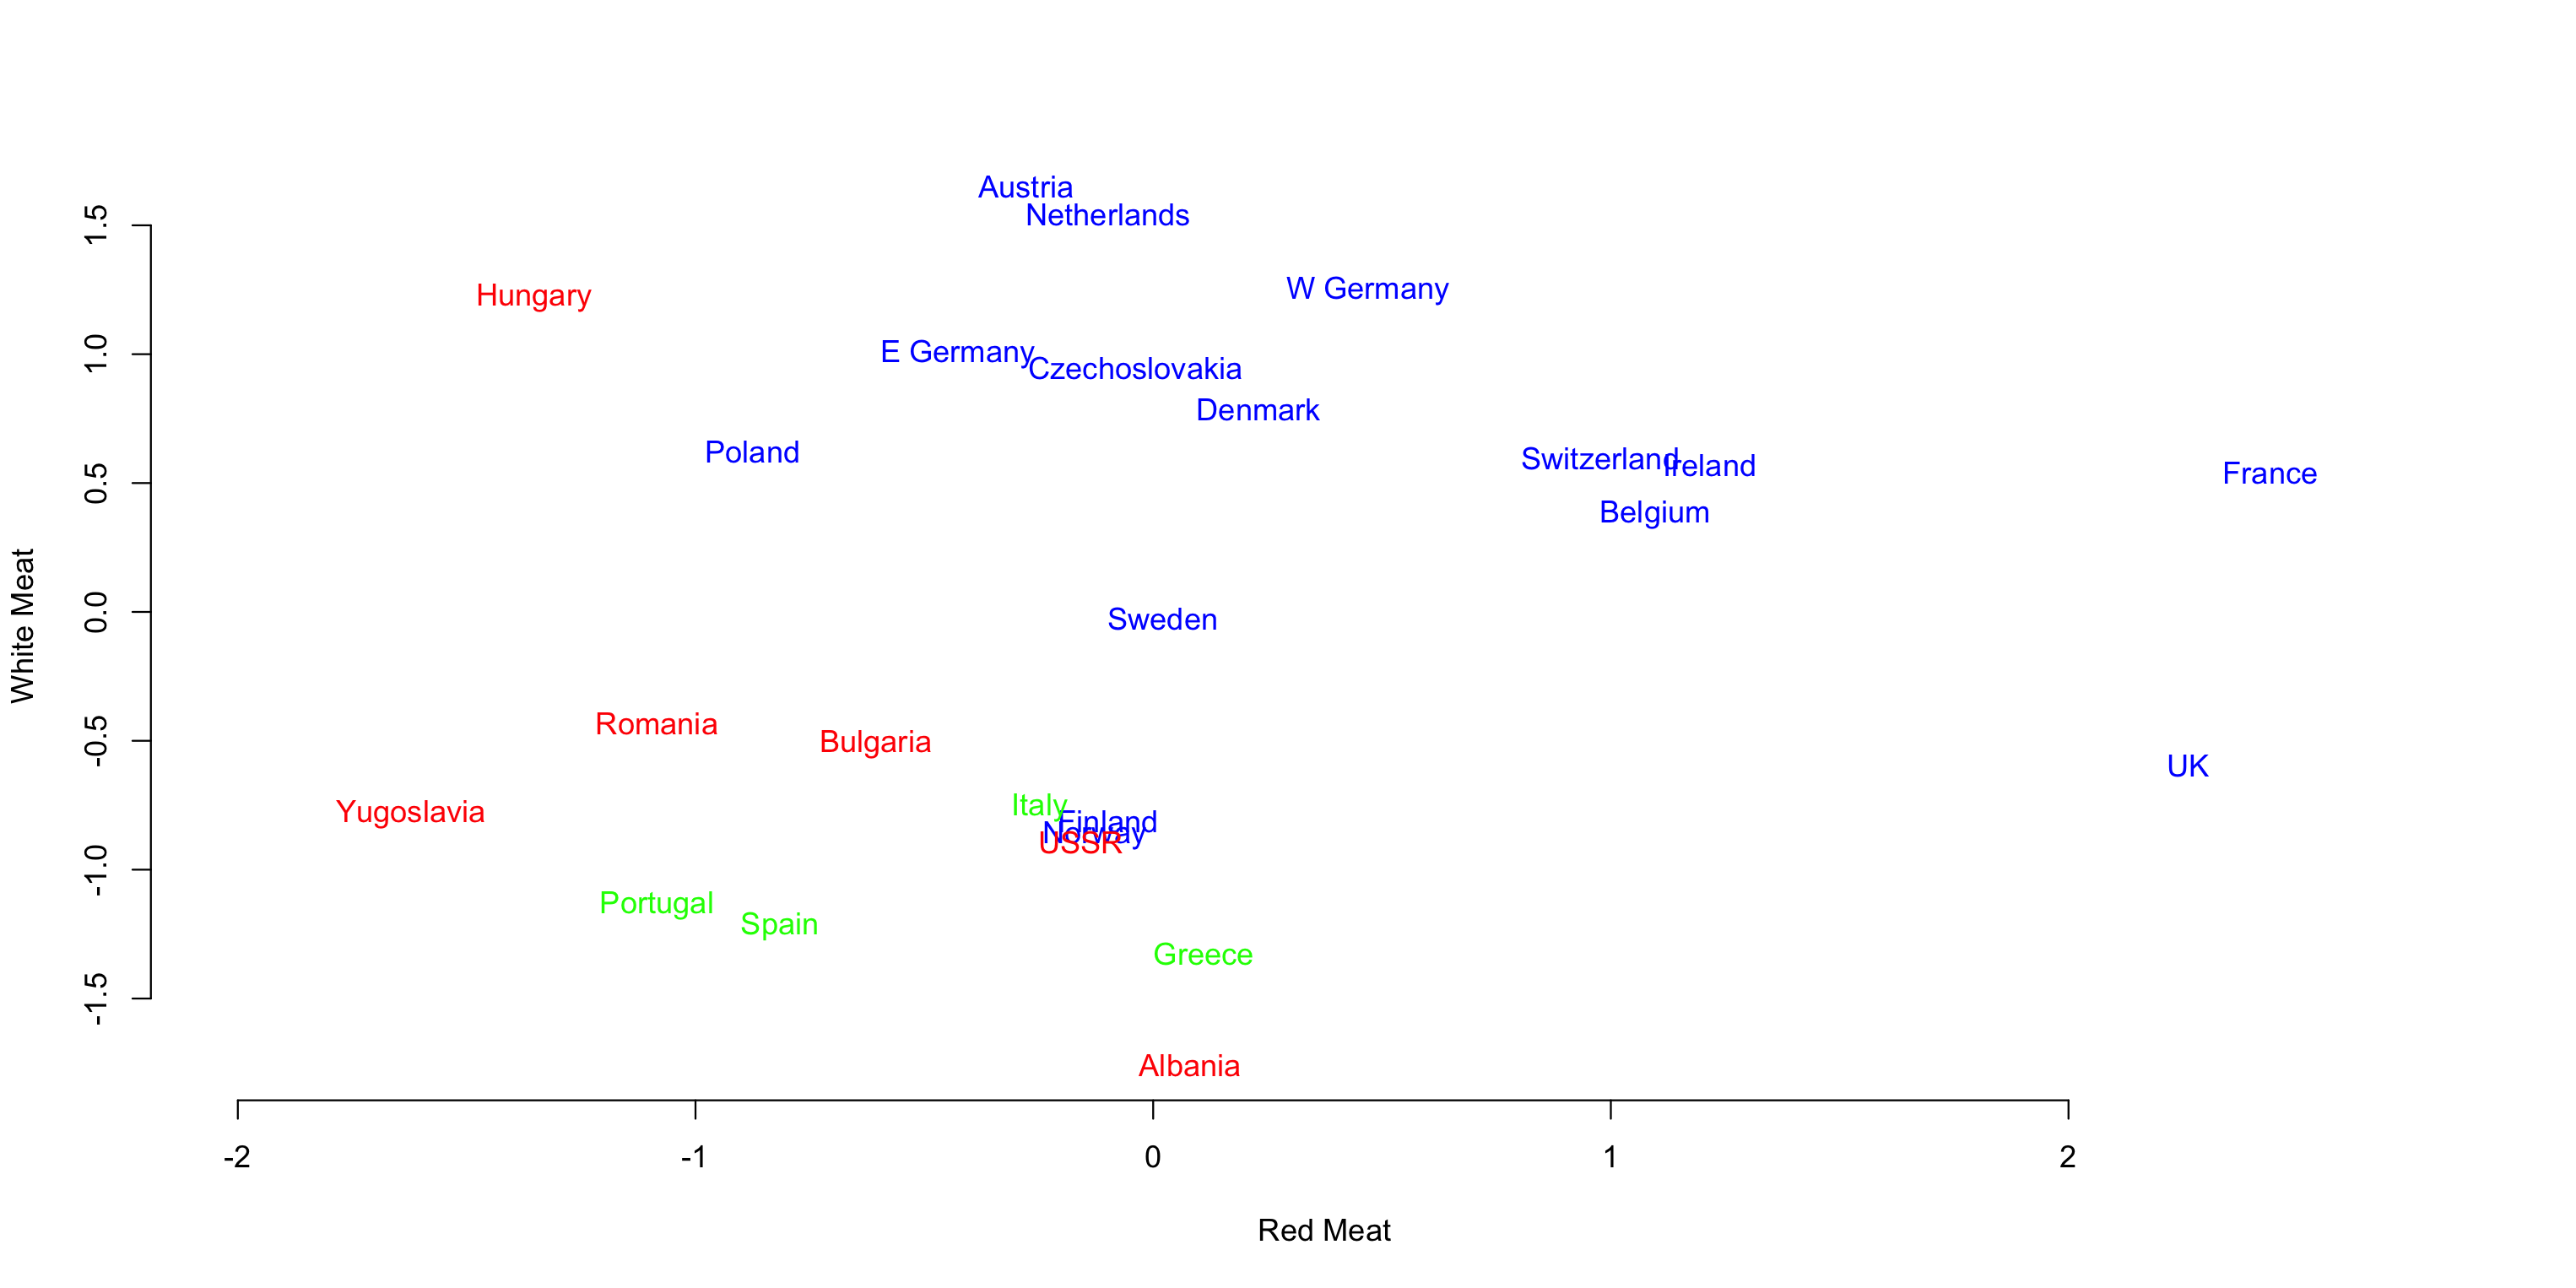

In [6]:
(grpMeat <- kmeans(xfood,  centers=3, nstart=10))


plot(xfood[,"RedMeat"], xfood[,"WhiteMeat"], xlim=c(-2,2.75), 
    type="n", xlab="Red Meat", ylab="White Meat", bty="n")
text(xfood[,"RedMeat"], xfood[,"WhiteMeat"], labels=rownames(food), 
    col=rainbow(3)[grpMeat$cluster])

We can repeat this with clustering on all protein groups:
(You can also change the number of centers to see what happens, the book does 3 first and then 7.)

In [7]:
grpProtein <- kmeans(xfood, centers=7, nstart=50)
grpProtein

K-means clustering with 7 clusters of sizes 4, 5, 4, 2, 4, 2, 4

Cluster means:
       RedMeat  WhiteMeat        Eggs       Milk       Fish    Cereals
1  0.006572897 -0.2290150  0.19147892  1.3458748  1.1582546 -0.8722721
2  1.599006499  0.2988565  0.93413079  0.6091128 -0.1422470 -0.5948180
3 -0.807569986 -0.8719354 -1.55330561 -1.0783324 -1.0386379  1.7200335
4 -0.068119111 -1.0411250 -0.07694947 -0.2057585  0.1075669  0.6380079
5 -0.605901566  0.4748136 -0.27827076 -0.3640885 -0.6492221  0.5719474
6 -0.949484801 -1.1764767 -0.74802044 -1.4583242  1.8562639 -0.3779572
7 -0.083057512  1.3613671  0.88491892  0.1671964 -0.2745013 -0.8062116
      Starch        Nuts     Fr.Veg
1  0.1676780 -0.95533923 -1.1148048
2  0.3451473 -0.34849486  0.1020010
3 -1.4234267  0.99613126 -0.6436044
4 -1.3010340  1.49973655  1.3659270
5  0.6419495 -0.04884971  0.1602082
6  0.9326321  1.12203258  1.8925628
7  0.3665660 -0.86720831 -0.1585451

Clustering vector:
       Albania        Austria        Belgium

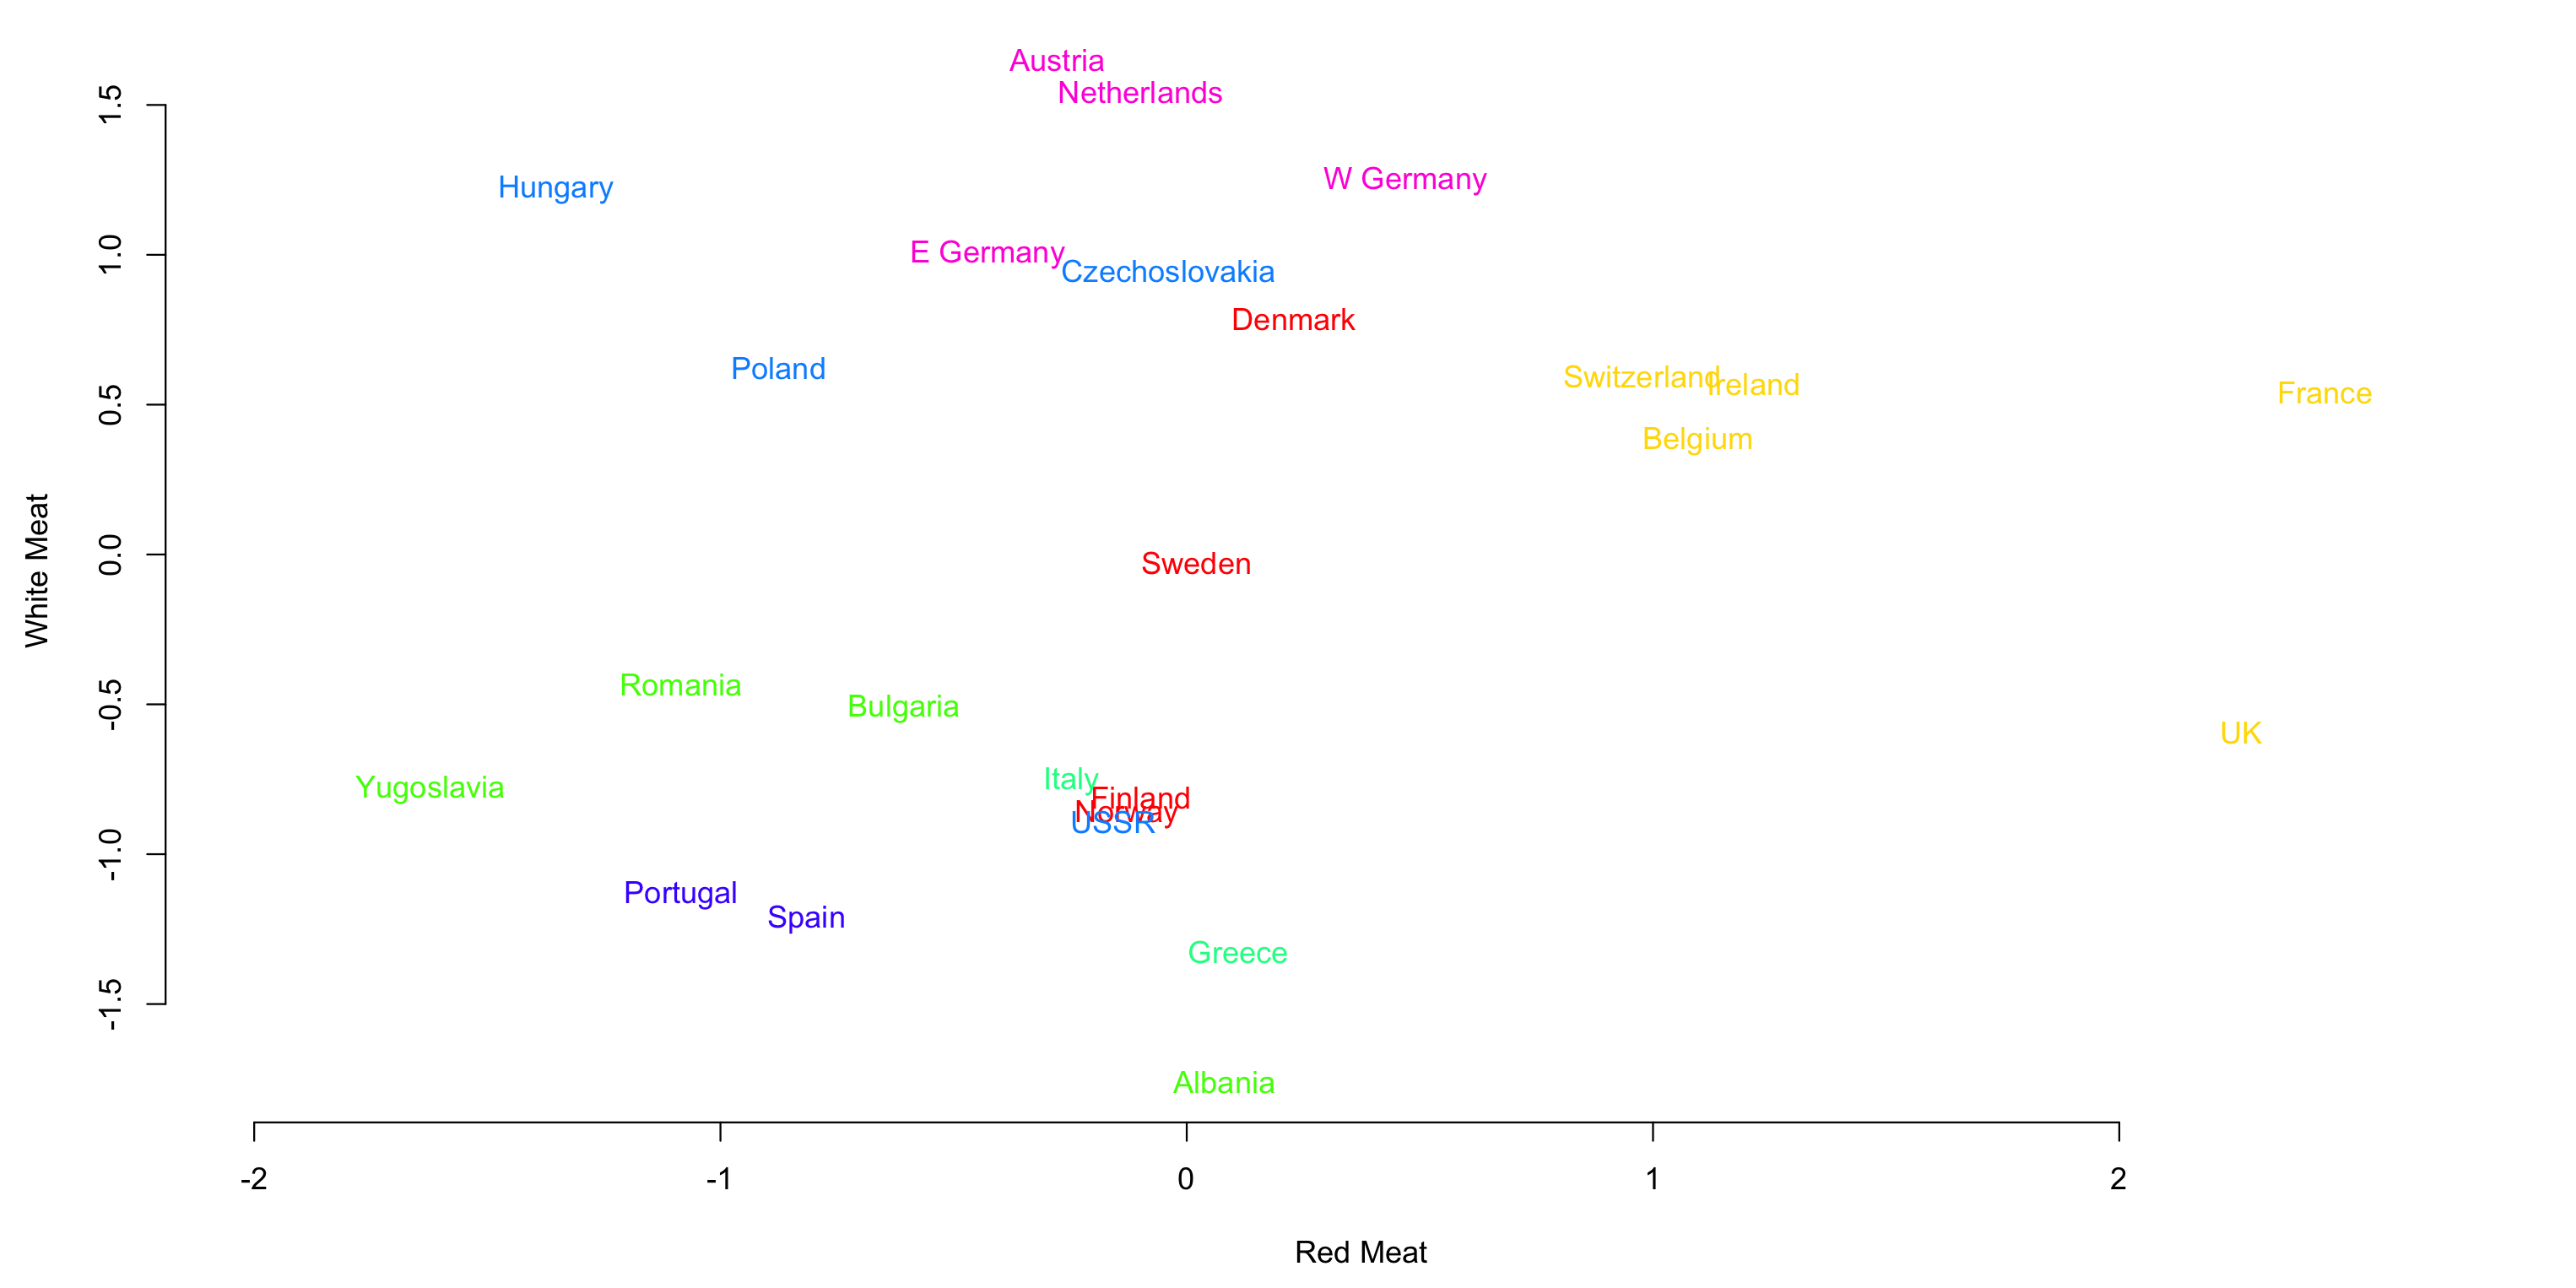

In [8]:
par(mai=c(.9,.9,.1,.1))
plot(xfood[,"RedMeat"], xfood[,"WhiteMeat"], xlim=c(-2,2.75), 
    type="n", xlab="Red Meat", ylab="White Meat", bty="n")
text(xfood[,"RedMeat"], xfood[,"WhiteMeat"], labels=rownames(food), 
    col=rainbow(7)[grpProtein$cluster]) ## color is all that differs from first plot

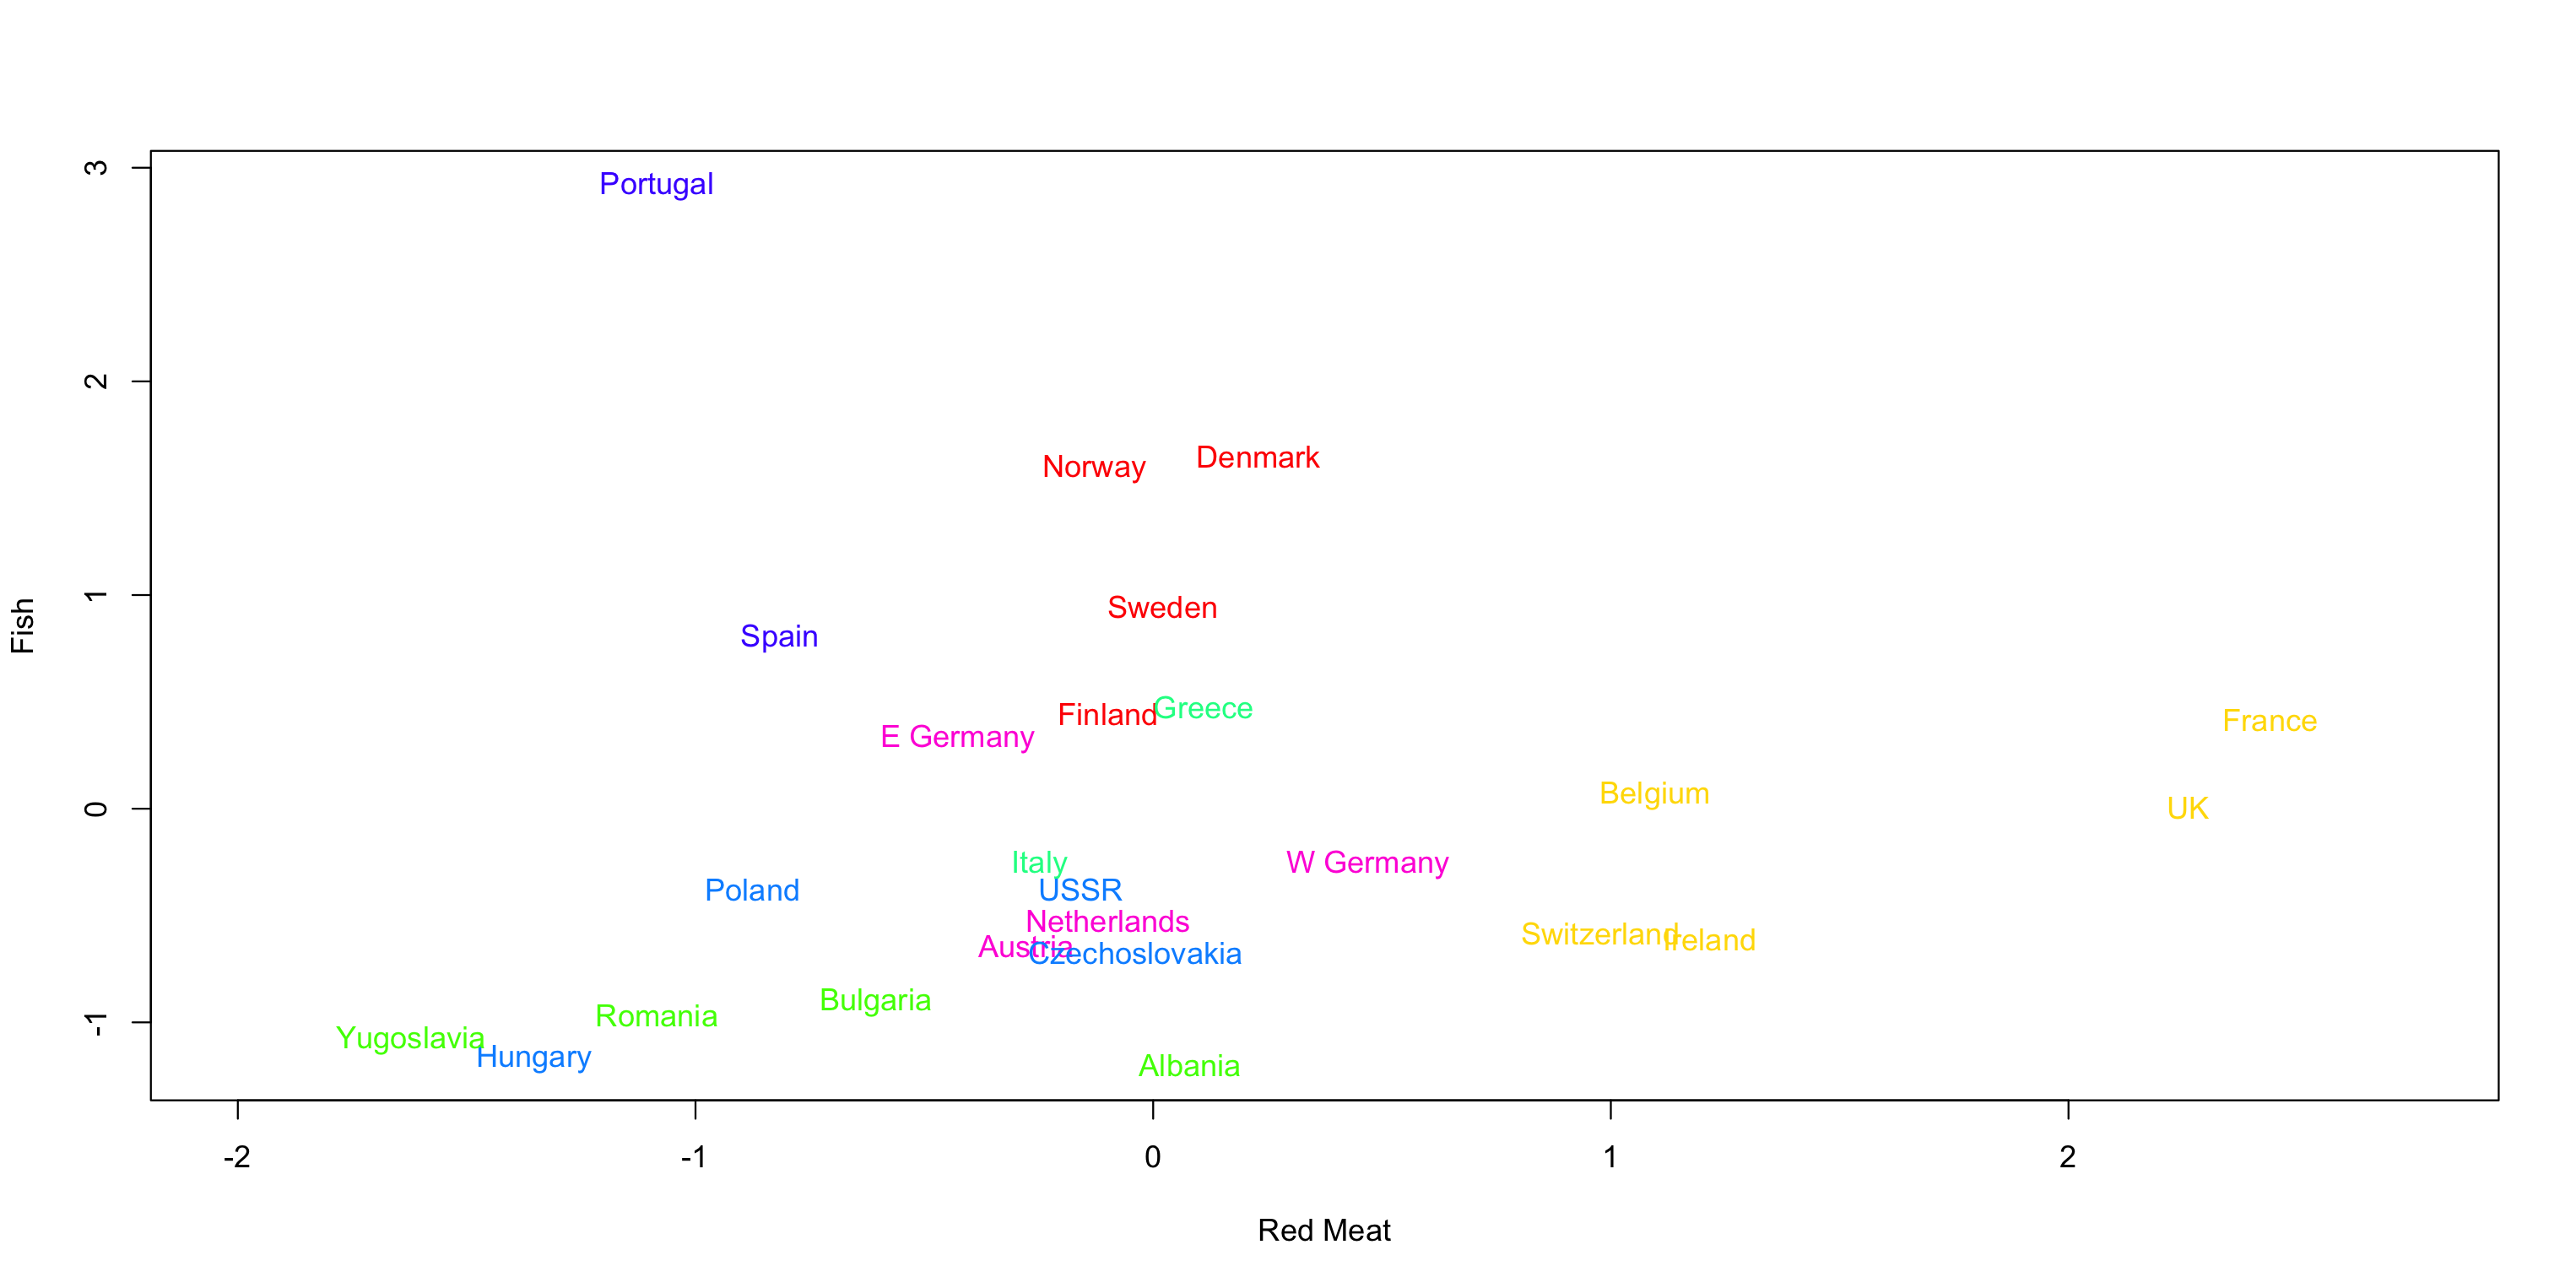

In [9]:
plot(xfood[,"RedMeat"], xfood[,"Fish"], xlim=c(-2,2.75), 
    type="n", xlab="Red Meat", ylab="Fish")
text(xfood[,"RedMeat"], xfood[,"Fish"], labels=rownames(food), 
    col=rainbow(7)[grpProtein$cluster])

Skipping over the genetic example, here is principal component analysis for this data:

In [10]:
pcfood <- prcomp(food, scale=TRUE)
round(pcfood$rotation, 1)

PC1  PC2  PC3  PC4  PC5  PC6  PC7  PC8  PC9 
RedMeat   -0.3 -0.1 -0.3 -0.6  0.3 -0.5  0.2  0.0  0.2
WhiteMeat -0.3 -0.2  0.6  0.0 -0.3 -0.1  0.0  0.0  0.6
Eggs      -0.4  0.0  0.2 -0.3  0.1  0.4 -0.4 -0.5 -0.3
Milk      -0.4 -0.2 -0.4  0.0 -0.2  0.6  0.5  0.1  0.2
Fish      -0.1  0.6 -0.3  0.2 -0.3 -0.1 -0.1 -0.4  0.3
Cereals    0.4 -0.2  0.1  0.0  0.2  0.1  0.4 -0.7  0.2
Starch    -0.3  0.4  0.2  0.3  0.7  0.1  0.2  0.1  0.1
Nuts       0.4  0.1 -0.1 -0.3  0.2  0.4 -0.4  0.2  0.5
Fr.Veg     0.1  0.5  0.4 -0.5 -0.2  0.1  0.4  0.1 -0.2

In [11]:
round( predict(pcfood, newdata=food["France",]),2)
head( round(zfood <- predict(pcfood),1)) 

PC1   PC2  PC3 PC4   PC5  PC6  PC7  PC8   PC9 
France -1.49 0.79 0   -1.96 0.25 -0.9 0.95 -0.02 0.54

PC1  PC2  PC3  PC4  PC5  PC6  PC7  PC8  PC9 
Albania         3.5 -1.6 -1.8 -0.2  0.0 -1.0 -0.5  0.8 -0.1
Austria        -1.4 -1.0  1.3 -0.2 -0.9  0.2 -0.2 -0.3 -0.2
Belgium        -1.6  0.2  0.2 -0.5  0.8 -0.3 -0.2 -0.2  0.0
Bulgaria        3.1 -1.3  0.2 -0.2 -0.5 -0.7  0.5 -0.8 -0.3
Czechoslovakia -0.4 -0.6  1.2  0.5  0.3 -0.8  0.3  0.0 -0.1
Denmark        -2.4  0.3 -0.8  1.0 -0.8 -0.2 -0.2 -0.6  0.5

We can verify that `predict` is just doing the same as the matrix multiplication below:

In [12]:
z <- scale(food)%*%pcfood$rotation
all(z==zfood)

[1] TRUE

This suggests rotations are on the scale of standard deviations if `scale=TRUE` in `prcomp`

We can do a bottoms-up investigation to make sense of the factors. Looks like PC1 is an 'average diet', PC2 is Iberian

In [13]:
t( round(pcfood$rotation[,1:2],2) )

RedMeat WhiteMeat Eggs  Milk  Fish  Cereals Starch Nuts Fr.Veg
PC1 -0.30   -0.31     -0.43 -0.38 -0.14  0.44   -0.30  0.42 0.11  
PC2 -0.06   -0.24     -0.04 -0.18  0.65 -0.23    0.35  0.14 0.54

In [14]:
## do some k-means, for comparison
grpProtein <- kmeans(scale(food), centers=7, nstart=20)

We can also plot the PC scores against each other, and maybe use the coloring from the 7-means clustering from above.

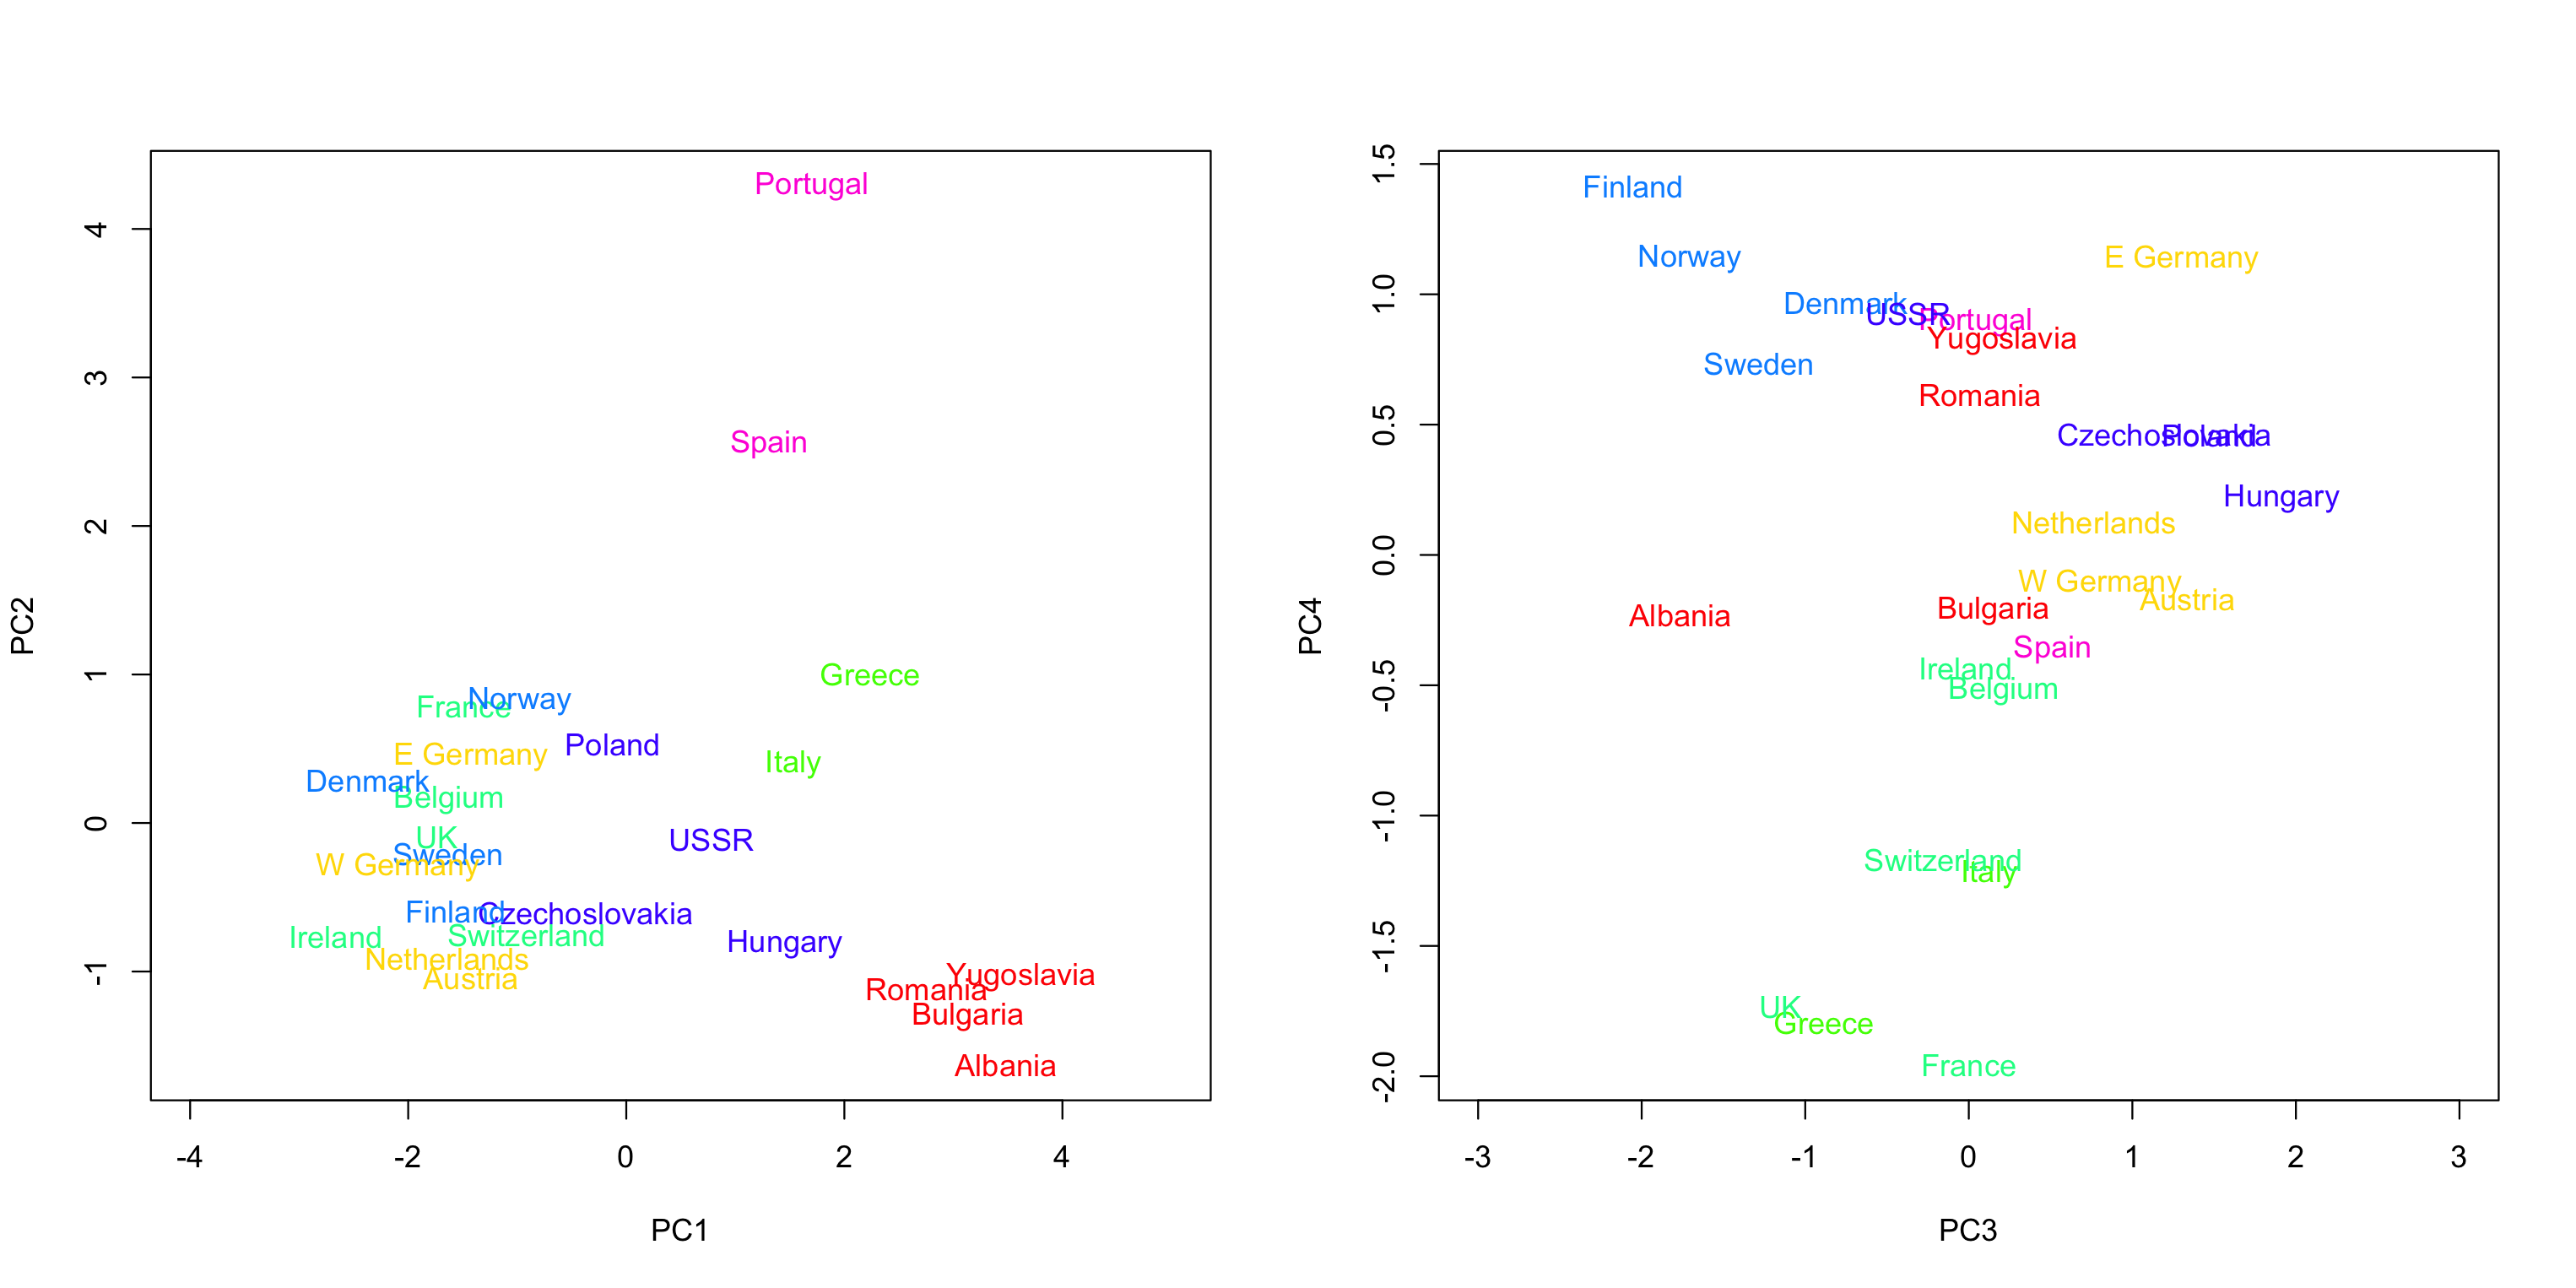

In [15]:
par(mfrow=c(1,2))
plot(zfood[,1:2], type="n", xlim=c(-4,5))
text(x=zfood[,1], y=zfood[,2], labels=rownames(food), col=rainbow(7)[grpProtein$cluster])
plot(zfood[,3:4], type="n", xlim=c(-3,3))
text(x=zfood[,3], y=zfood[,4], labels=rownames(food), col=rainbow(7)[grpProtein$cluster])

The whole point of the exercise is that you won't use all components. But how many to keep? Does the explained (picked up, differentiated) variance drop off precipitously at some point? Here not really.

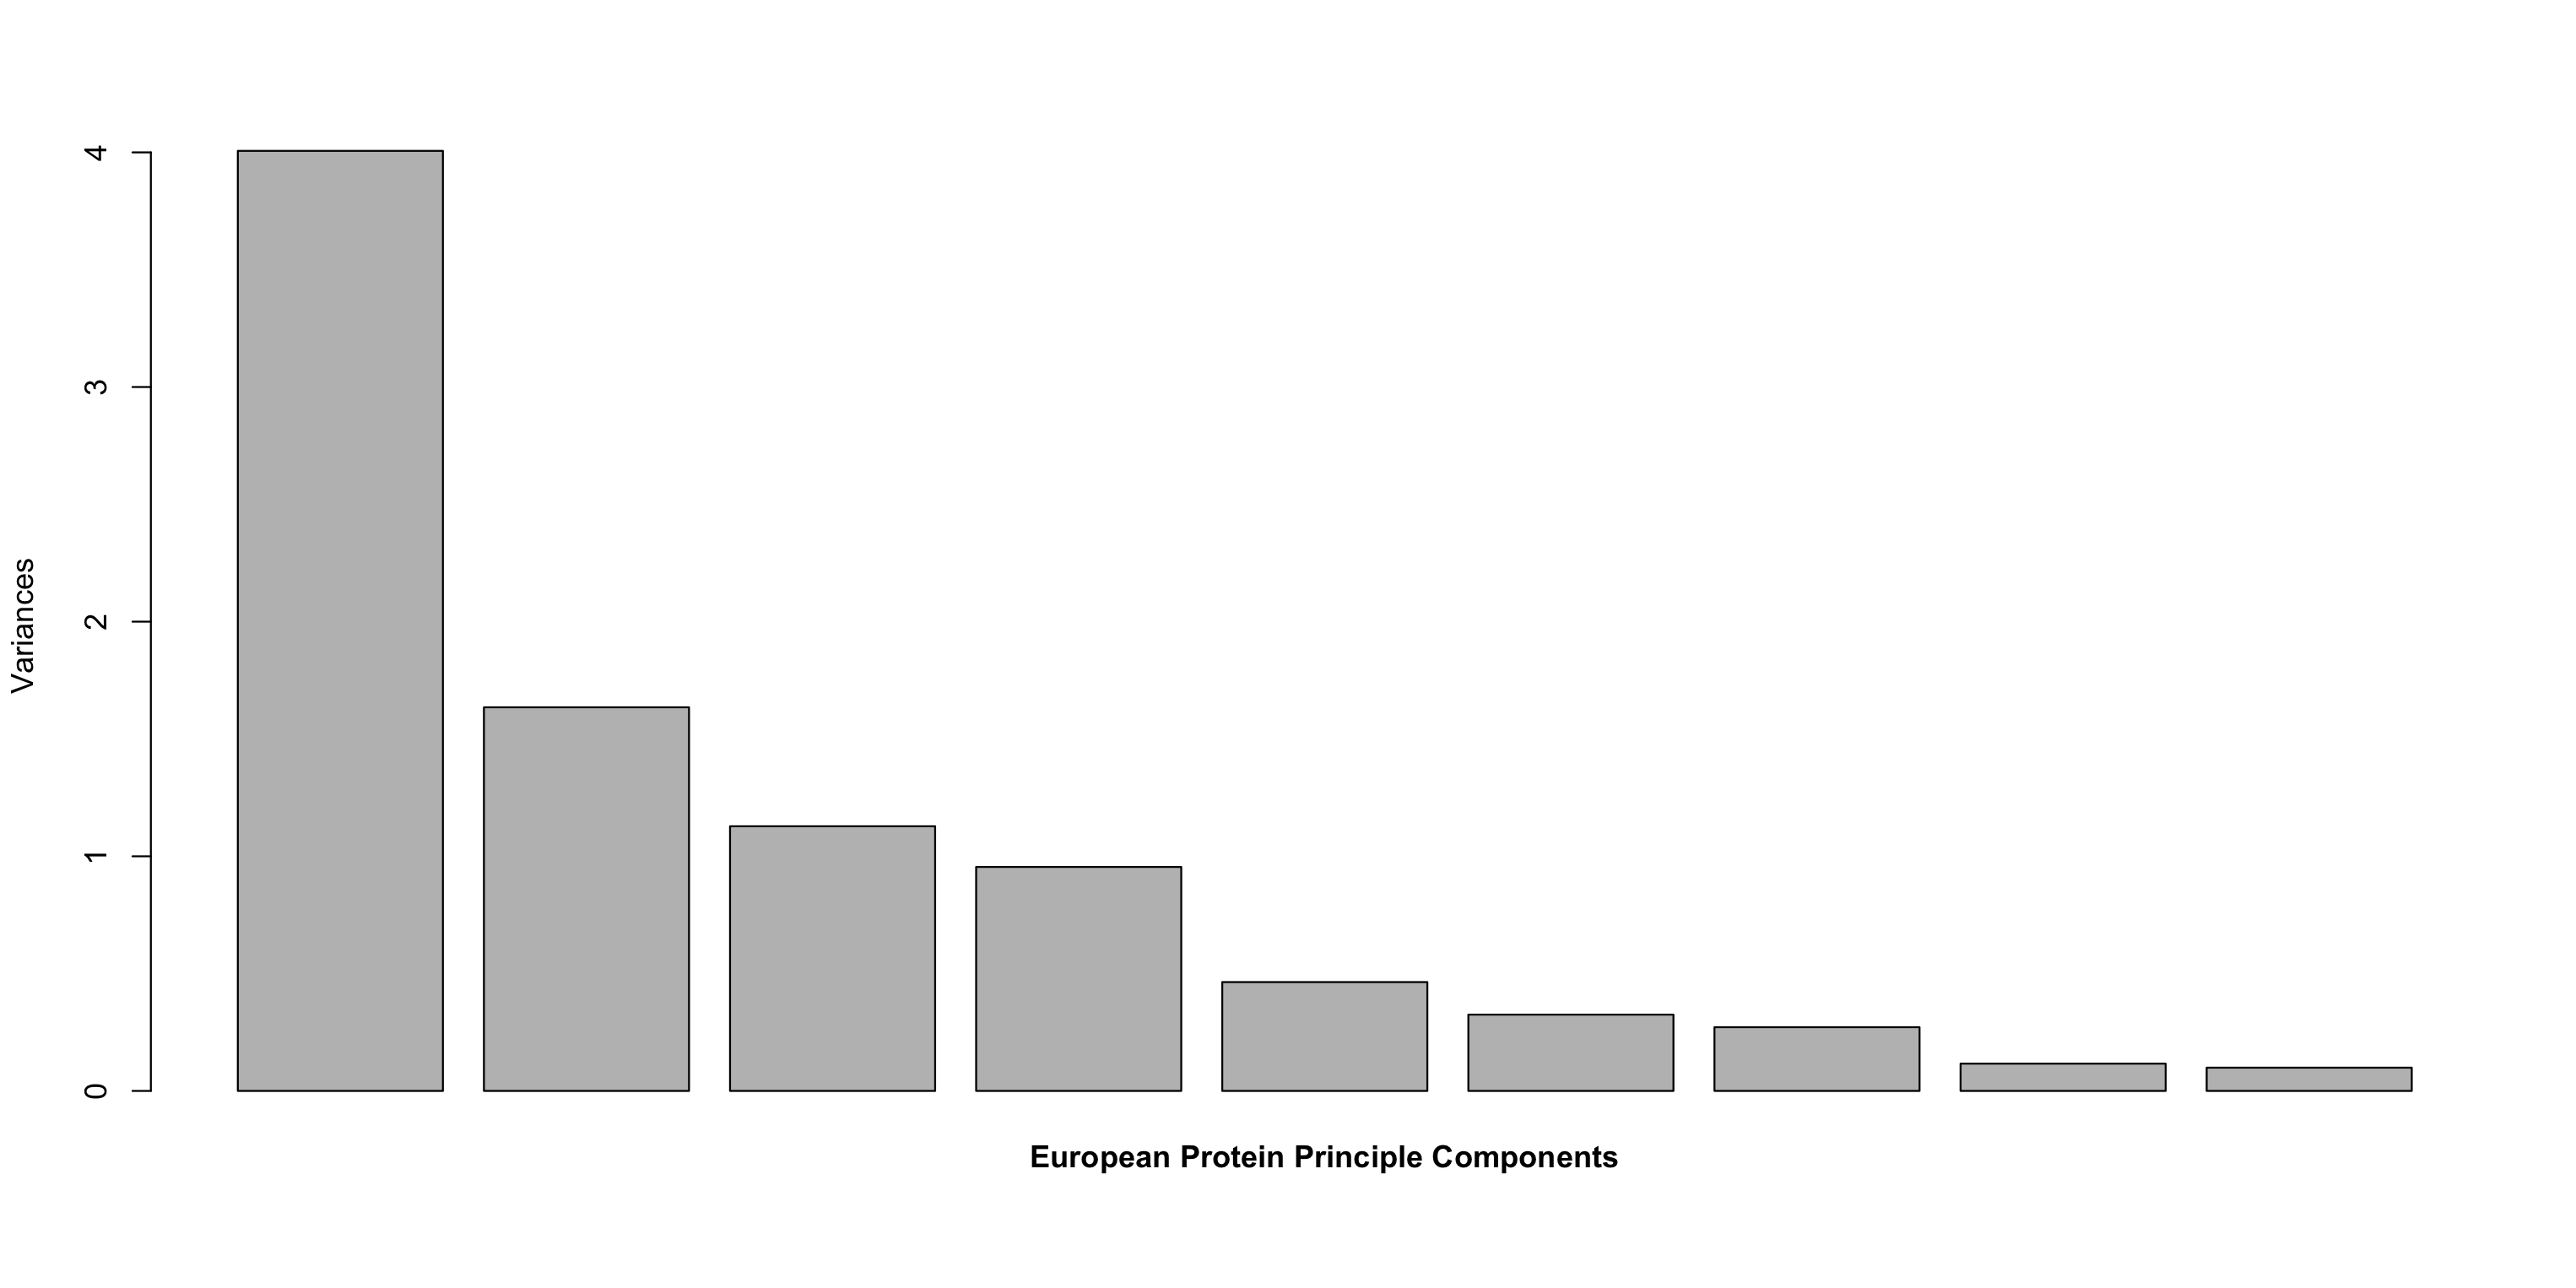

In [16]:
plot(pcfood, main="")
mtext(side=1, "European Protein Principle Components",  line=1, font=2)

By the way, the default `summary` is even better, it puts these scree plots on a more intuitive scale: the proportion of variation explained.

In [17]:
summary(pcfood)

Importance of components:
                          PC1    PC2    PC3    PC4     PC5     PC6     PC7
Standard deviation     2.0016 1.2787 1.0620 0.9771 0.68106 0.57020 0.52116
Proportion of Variance 0.4452 0.1817 0.1253 0.1061 0.05154 0.03613 0.03018
Cumulative Proportion  0.4452 0.6268 0.7521 0.8582 0.90976 0.94589 0.97607
                           PC8     PC9
Standard deviation     0.34102 0.31482
Proportion of Variance 0.01292 0.01101
Cumulative Proportion  0.98899 1.00000

# Congressional factors

We can also find simple patterns among congressional votes of legislators (coming from two separate tables here, often more efficient).

In [18]:
votes <- read.csv("rollcall-votes.csv")
legis <- read.csv("rollcall-members.csv")

In [19]:
head(votes[,1:6])

Vote.1 Vote.2 Vote.3 Vote.4 Vote.5 Vote.6
BONNER (R AL-1)     -1      1     -1      0      0      1    
BRIGHT (D AL-2)      1     -1      1      1      1      1    
ROGERS (R AL-3)     -1      1     -1     -1     -1      1    
ADERHOLT (R AL-4)   -1      1     -1     -1      1      1    
GRIFFITH (D/R AL-5)  1     -1      1      1      1     -1    
BACHUS (R AL-6)     -1      1     -1      1      1      1

Not surprisingly, most voting behavior can be explained by a few factors. If anything, it is surprising the second component is relatively powerful at all.

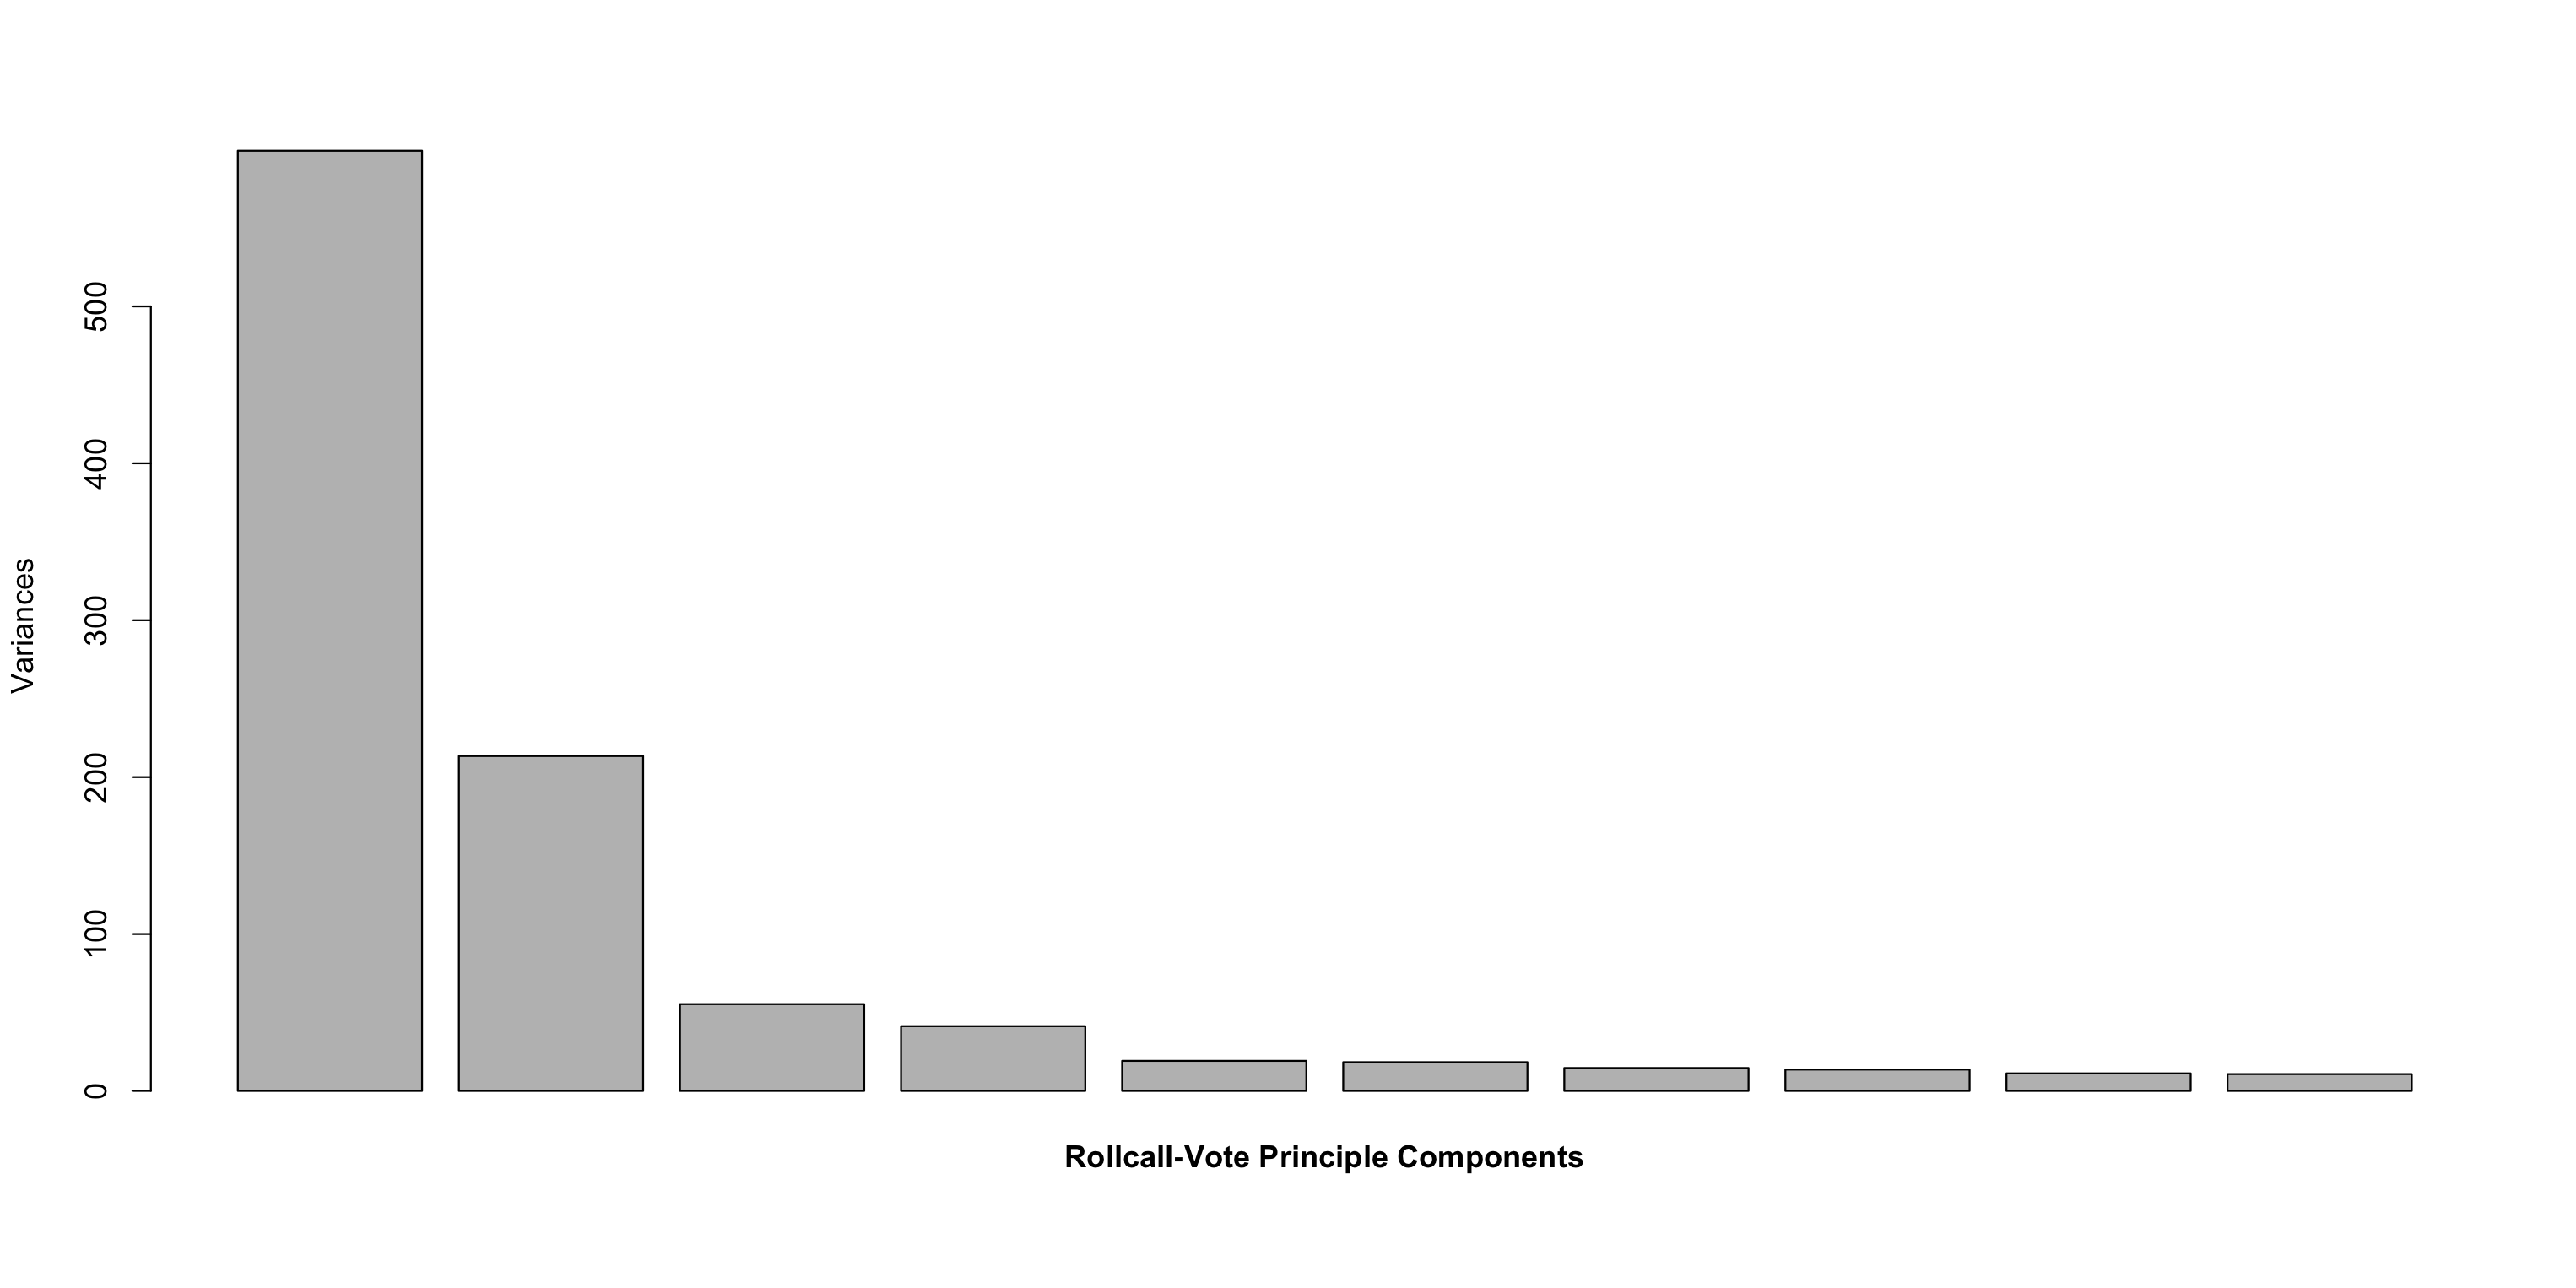

In [20]:
pcavote <- prcomp(votes, scale=TRUE)
plot(pcavote, main="")
mtext(side=1, "Rollcall-Vote Principle Components",  line=1, font=2)

You can plot the first components for each member, maybe even color them by party (red is for conservatives in the US, not for leftists).

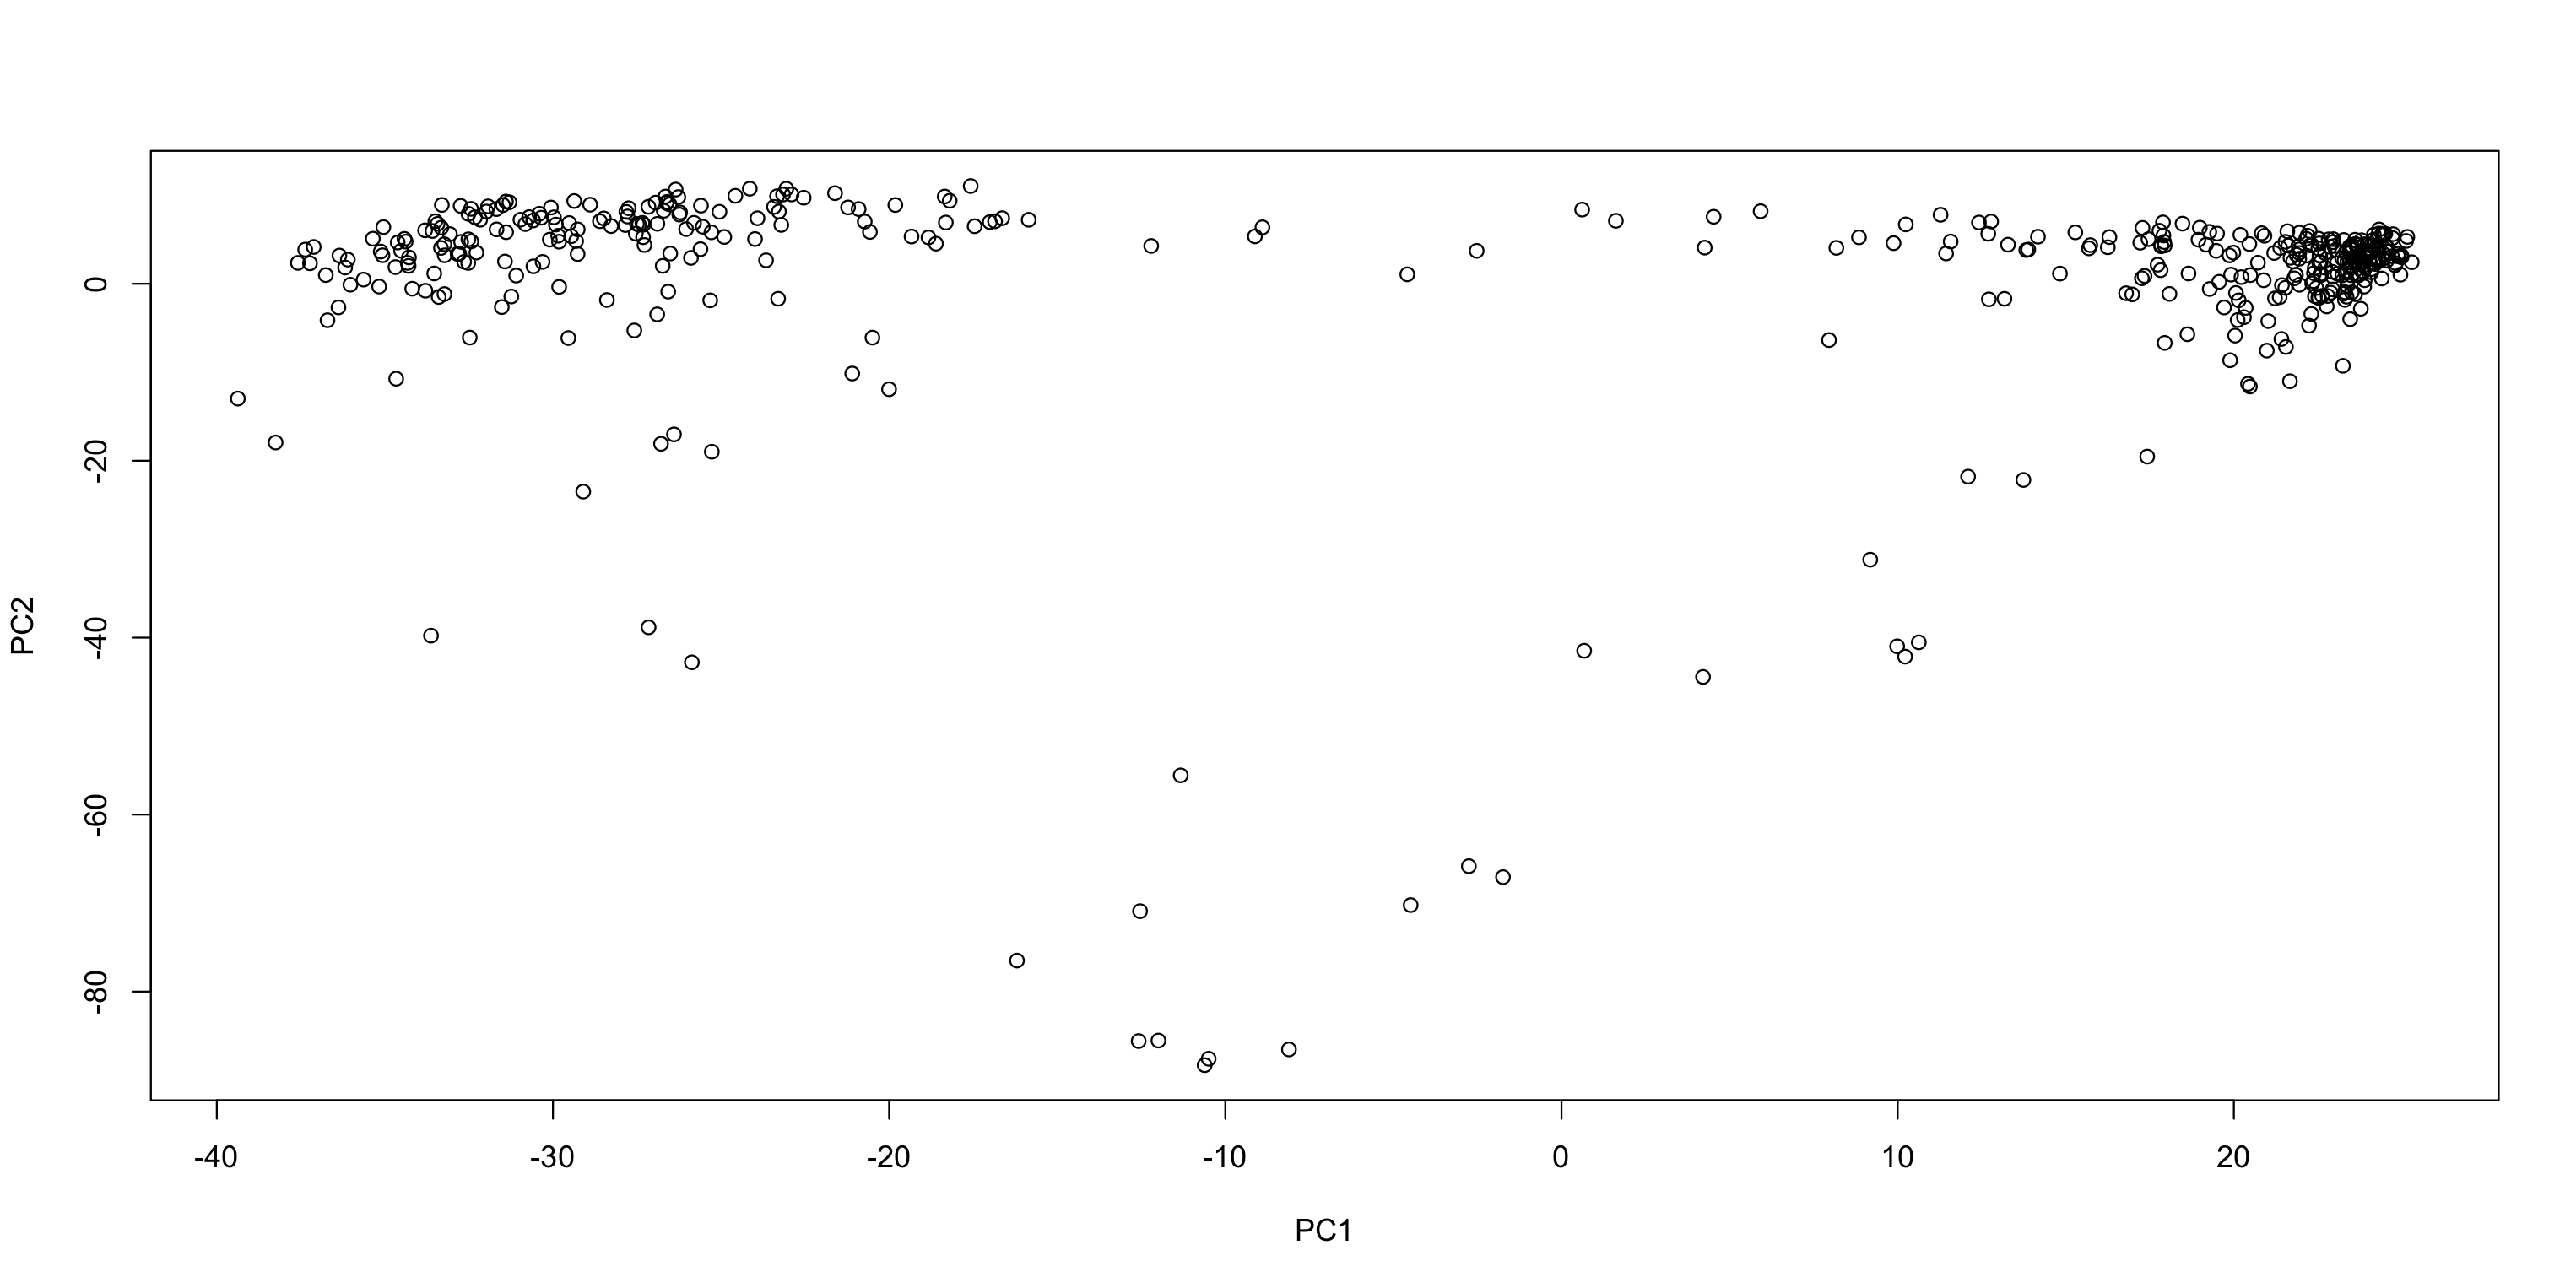

In [21]:
votepc <- predict(pcavote) # scale(votes)%*%pcavote$rotation
plot(votepc[,1:2], pch=21, bg=(4:2)[legis$party], main="")

For the top-down approach, you can investigate the extremes scores for the politicians:

In [22]:
votepc[order(votepc[,1])[1:5],1]
votepc[order(-votepc[,1])[1:5],1]

BROUN (R GA-10)     FLAKE (R AZ-6) HENSARLIN (R TX-5)   LAMBORN (R CO-5) 
         -39.37394          -38.25067          -37.58706          -37.37032 
   FRANKS (R AZ-2) 
         -37.22842

EDWARDS (D MD-4)    PRICE (D NC-4)   MATSUI (D CA-5) SCHAKOWS (D IL-9) 
         25.29151          25.15912          25.12481          24.98754 
  HIRONO (D HI-2) 
         24.98547

At least domain experts could recognize partisan politicians on the two extremes above. But what about the second component?

In [23]:
votepc[order(votepc[,2])[1:5],2]
votepc[order(-votepc[,2])[1:5],2]

SOLIS (D CA-32) GILLIBRAND (D NY-20)      PELOSI (D CA-8) 
           -88.31351            -87.58872            -86.53586 
   STUTZMAN (R IN-3)       REED (R NY-29) 
           -85.59217            -85.53636

LOBIONDO (R NJ-2)    UPTON (R MI-6)    LANCE (R NJ-7)  GUTHRIE (R KY-2) 
         11.04252          10.74400          10.74006          10.64870 
BIGGERT (R IL-13) 
         10.23859

For the bottoms-up approach, you should look at the loadings on the votes.

In [24]:
loadings <- pcavote$rotation[,1:2]

We (or domains experts) can see that partisan votes seem to separate the politicians for PC1:

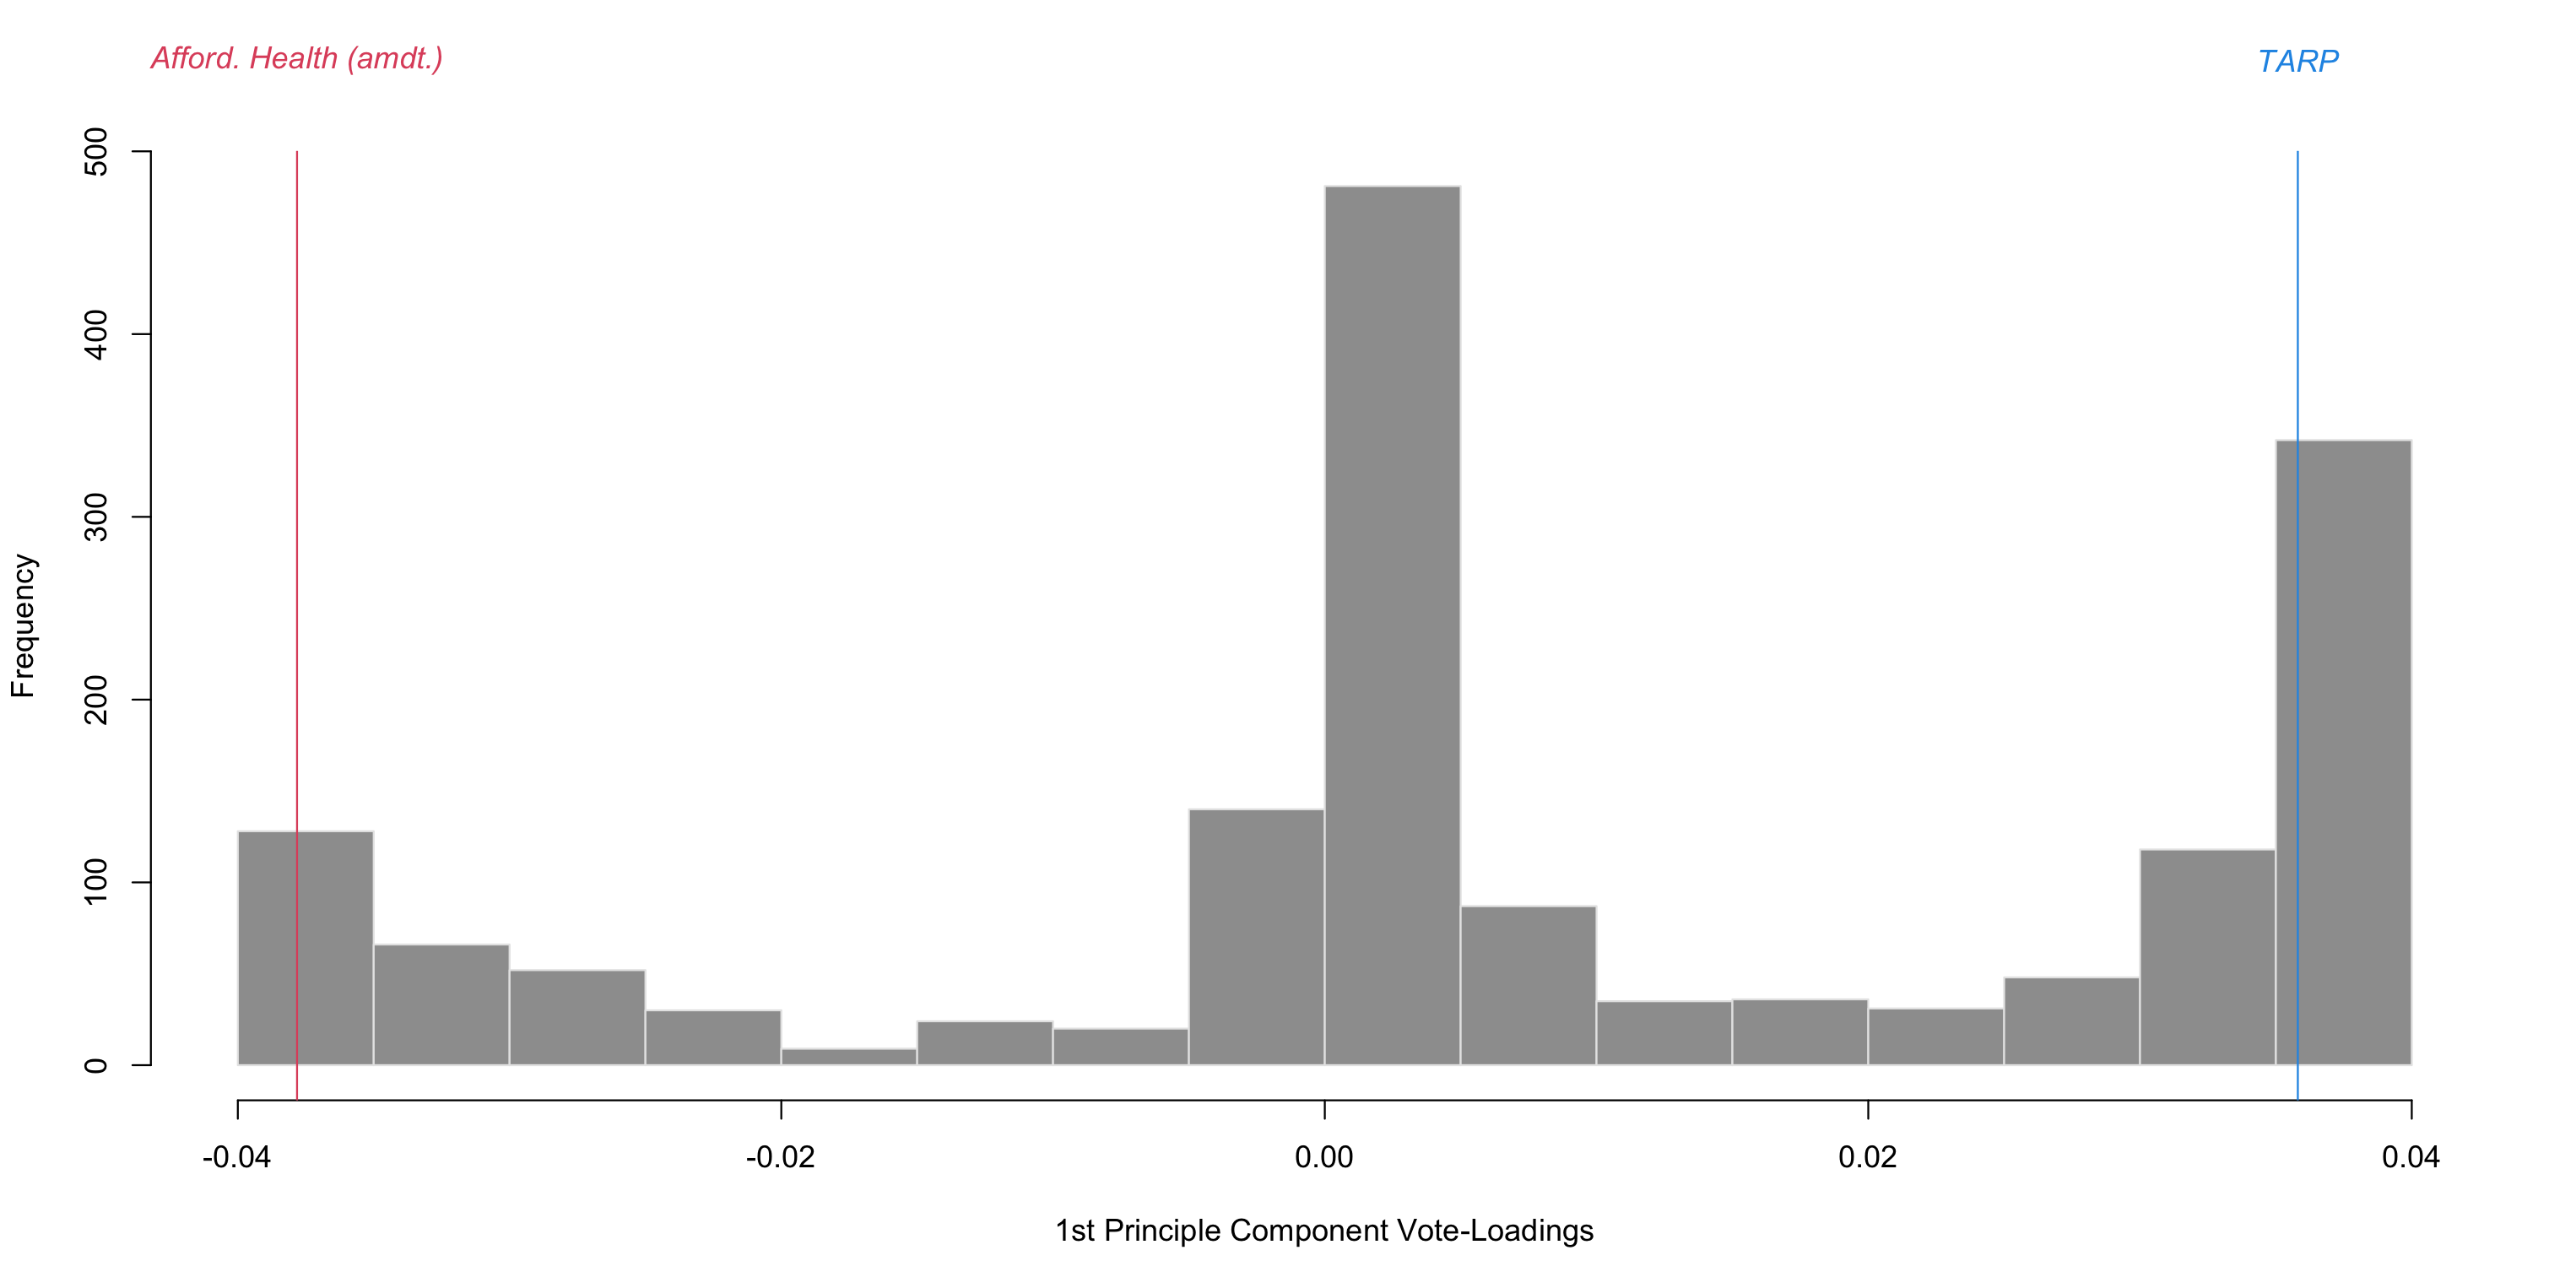

In [25]:
hist(loadings[,1], main="", xlab="1st Principle Component Vote-Loadings",
     col=8, border=grey(.9))
abline(v=loadings[884,1], col=2)
text(x=loadings[884,1], y=550, "Afford. Health (amdt.)", xpd=TRUE, col=2, font=3)
abline(v=loadings[25,1], col=4)
text(x=loadings[25,1], y=550, "TARP", xpd=TRUE, col=4, font=3)

The second factor can be harder, though domain experts would tell you that unanimous votes seem to somehow separate politicians for PC2.

In [26]:
loadings[order(abs(loadings[,2]), decreasing=TRUE)[1:5],2]

Vote.1146   Vote.658  Vote.1090  Vote.1104  Vote.1149 
0.05605862 0.05461947 0.05300806 0.05168382 0.05155729

How could this be? Those stand out who did not show up. So "busy-ness" also explains the votes that partisanship doesn't. A bit depressing.

In [27]:
sort(rowSums(votes==0), decreasing=TRUE)[1:5]

SOLIS (D CA-32) GILLIBRAND (D NY-20)       REED (R NY-29) 
                1628                 1619                 1562 
   STUTZMAN (R IN-3)      PELOSI (D CA-8) 
                1557                 1541

# Principal Component Regressions to see which shows get picked up

In [28]:
shows <- read.csv("nbc_showdetails.csv", row.names=1) ## show details; ratings and engagement
shows$Genre <- factor(shows$Genre)

Let's plot ratings against engagement for these 40 shows, colored by genre.

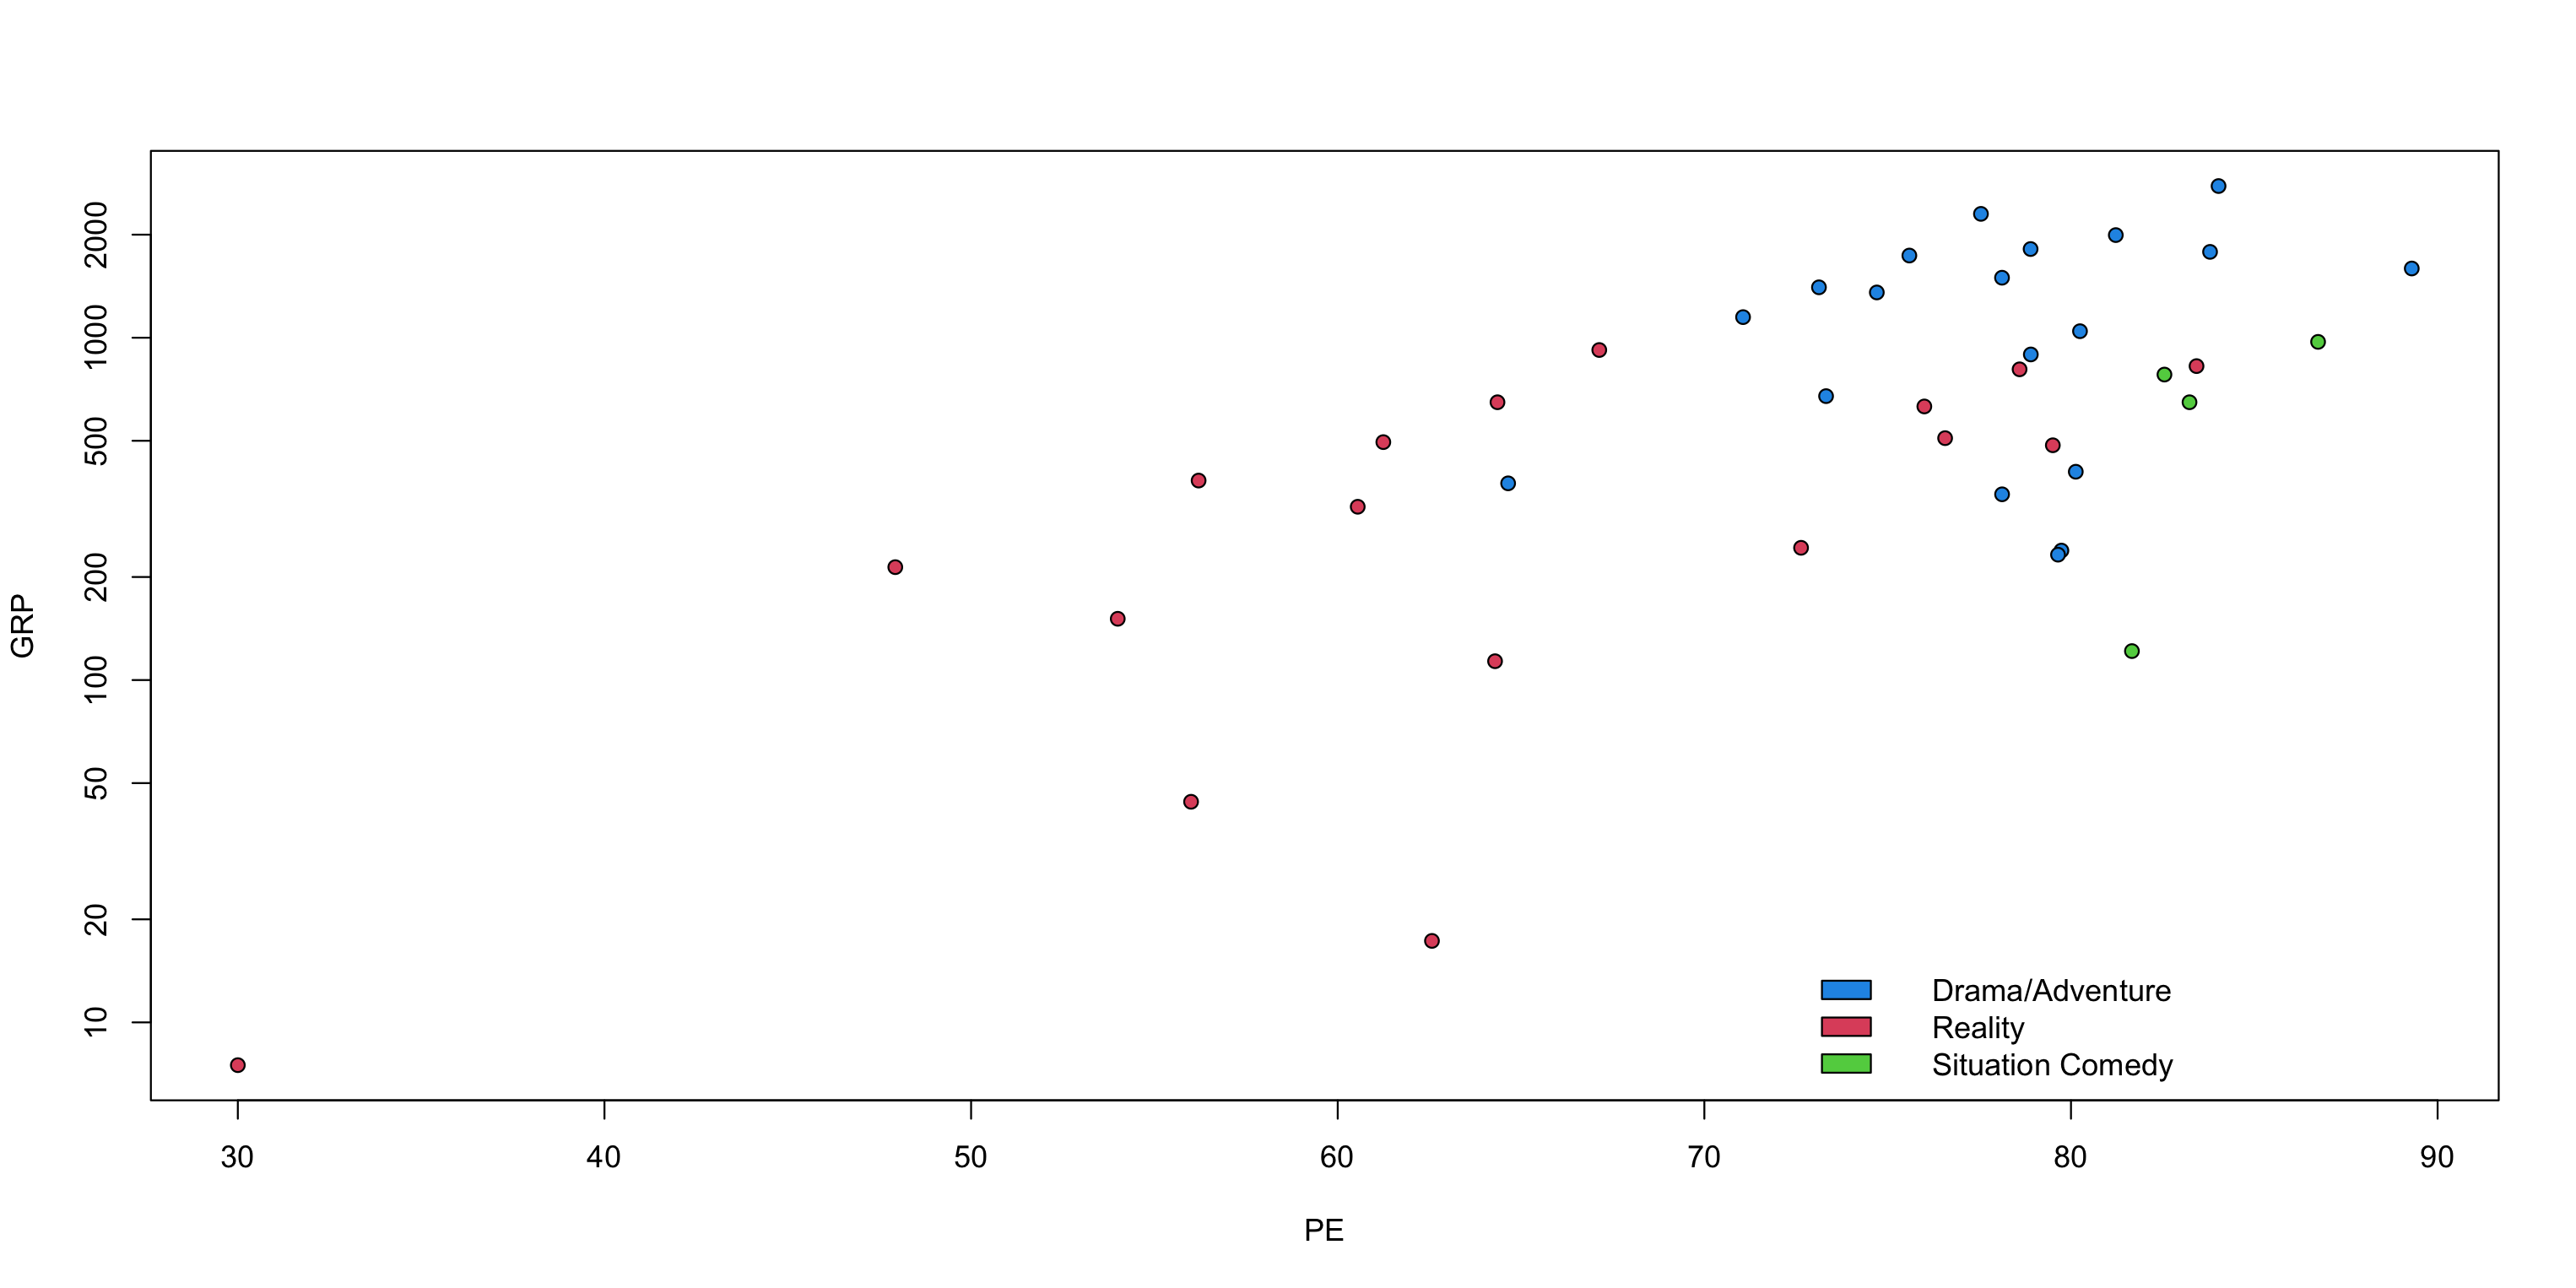

In [29]:
plot(GRP ~ PE, data=shows, bg=c(4,2,3)[shows$Genre], pch=21, log="y")
legend("bottomright", legend=levels(shows$Genre), fill=c(4,2,3), bty="n")

We also have the pilot focus group survey results.

For each question, 1=strongly disagree, 5=strongly agree, or
1: 'The show makes me feel …', 2: 'I found the show …'

In [30]:
survey <- read.csv("nbc_pilotsurvey.csv", as.is=TRUE) 
survey$Show <- factor(survey$Show, levels=rownames(shows))

This is a bit too detailed, we don't need this by viewers, let's just use average survey results by show:

In [31]:
Xpilot <- aggregate(survey[,-(1:2)],  ## -(1:2) to remove the variables 'show' and 'viewer' completely
                by=list(Show=survey$Show), mean)

Another data cleaning lesson: `aggregate` adds the 'by' variable levels (here: show names) back in. Let's strip it and use them as rownames instead (but check that we got what we expected).

In [32]:
rownames(Xpilot) <- Xpilot[,1]
Xpilot <- Xpilot[,-1]
all(rownames(Xpilot)==rownames(shows)) ## sanity check

[1] TRUE

As common for redundant surveys, look at PCA of the (average) responses.

In [33]:
PCApilot <- prcomp(Xpilot, scale=TRUE)

Screeplot:

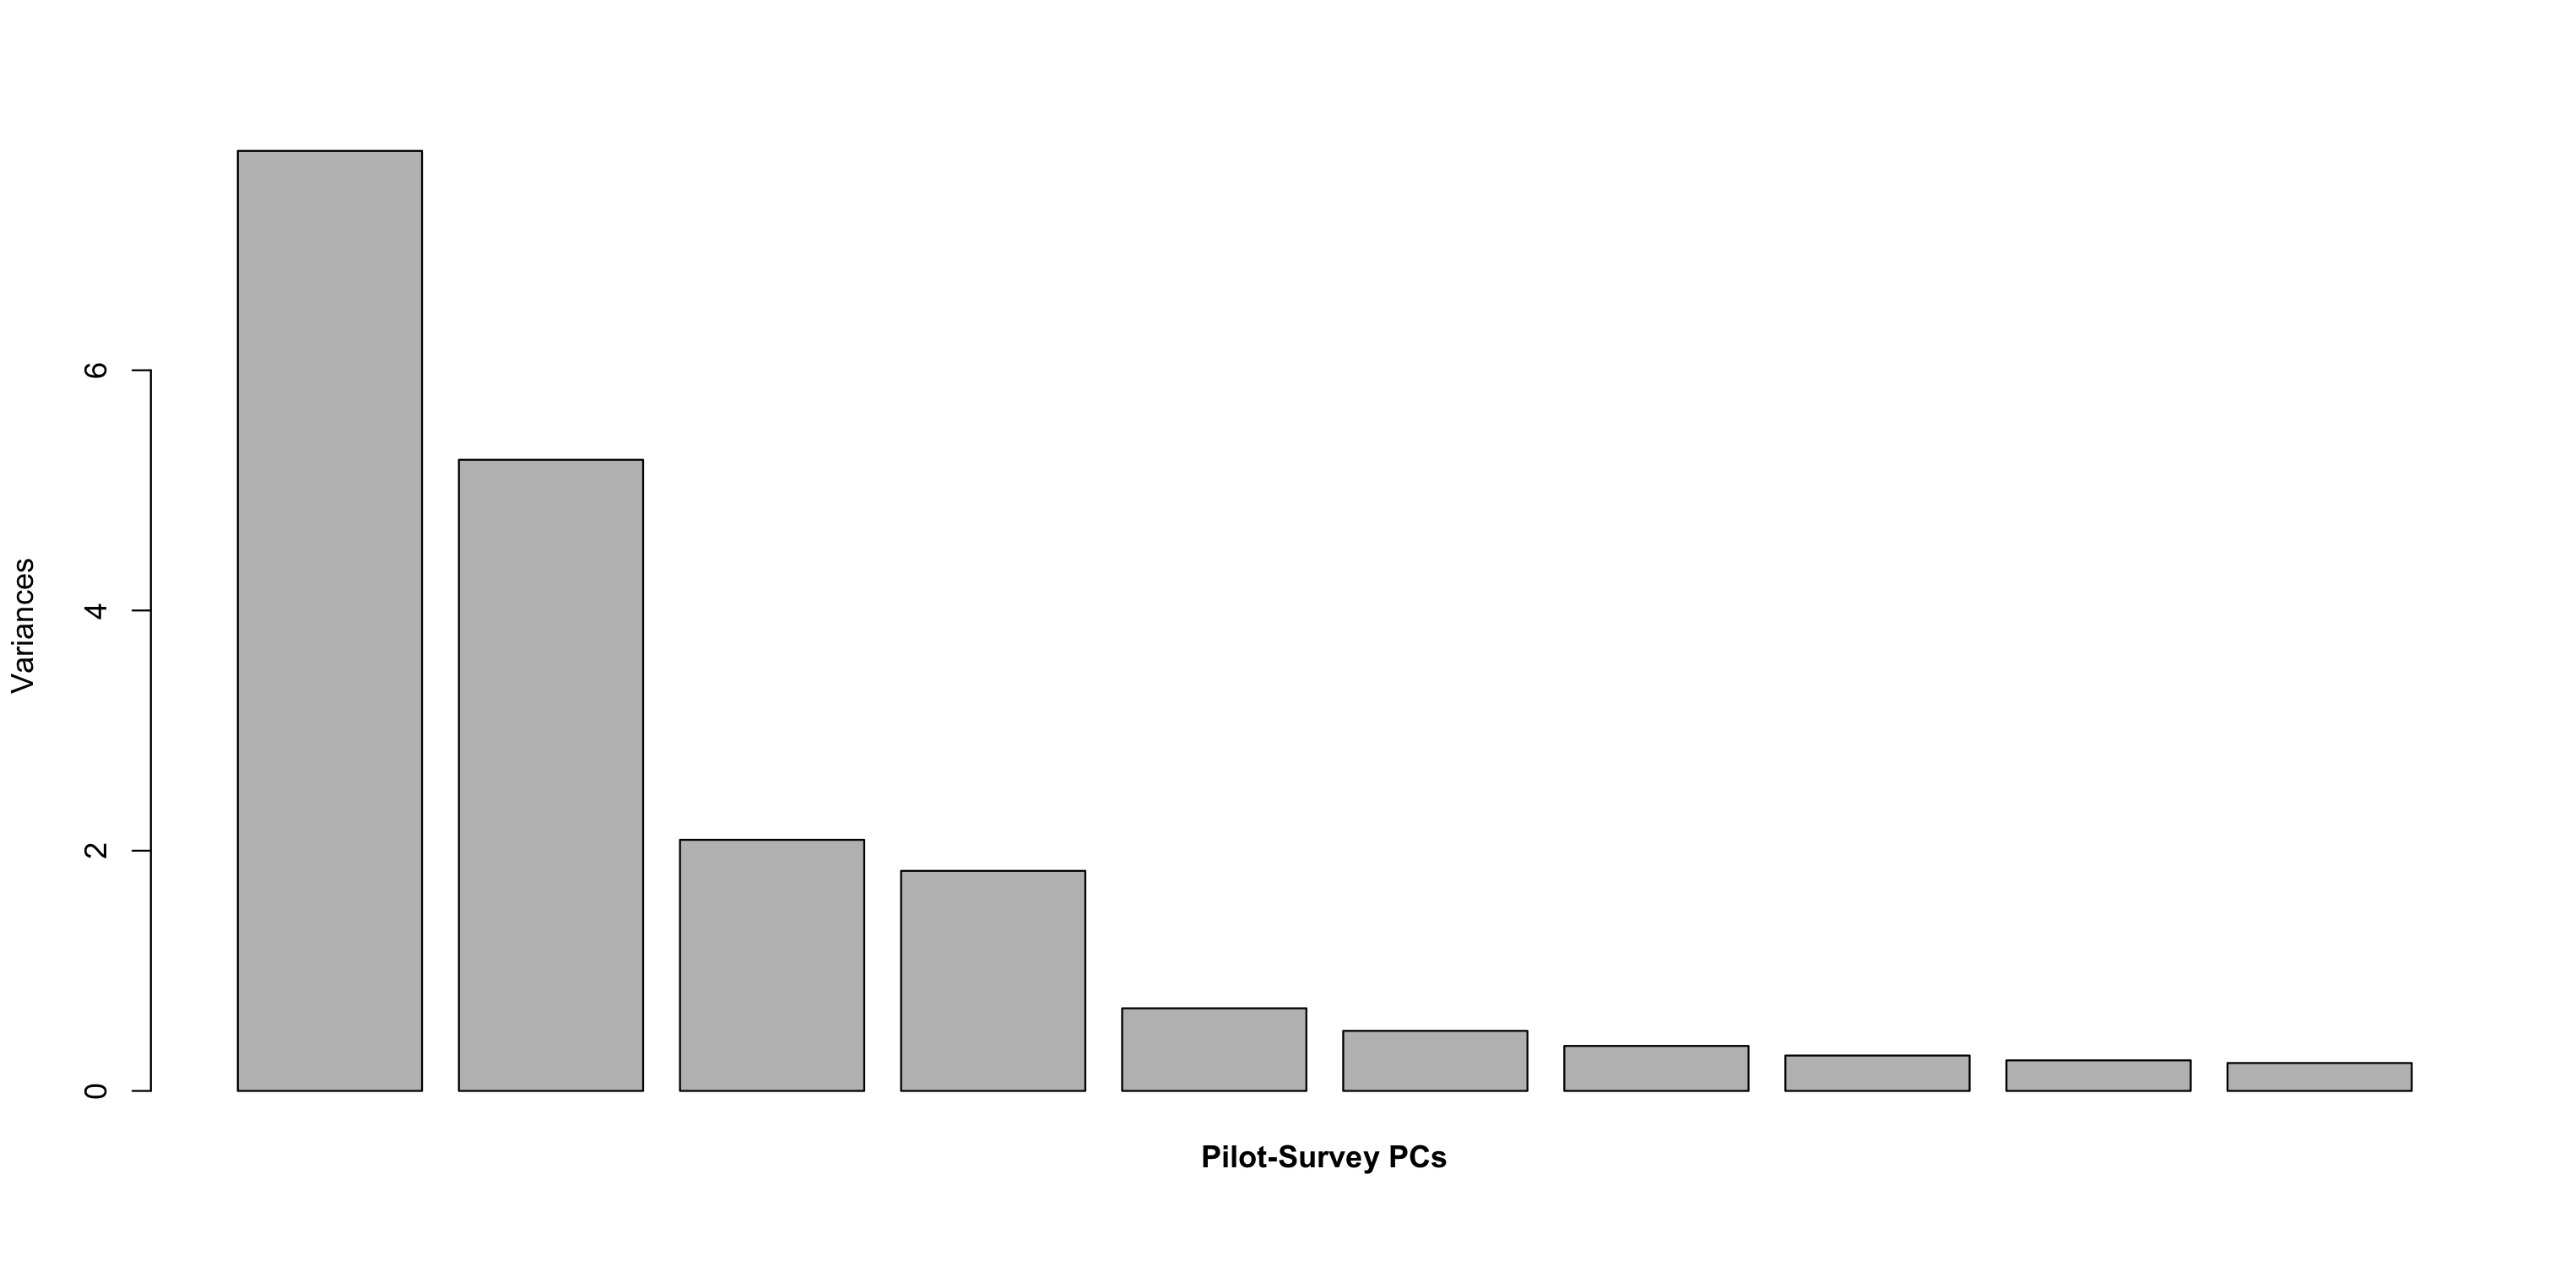

In [34]:
plot(PCApilot, main="")
mtext(side=1, "Pilot-Survey PCs",  line=1, font=2)

What do the first few PCs load on? First is maybe in the 'bad' or 'not drama' direction,second loads high on both boring and comforted…

In [35]:
round(PCApilot$rotation[,1:3],1)

PC1  PC2  PC3 
Q1_Attentive    -0.3  0.0  0.0
Q1_Excited      -0.3  0.1 -0.1
Q1_Happy        -0.1  0.2 -0.5
Q1_Engaged      -0.3  0.0  0.0
Q1_Curious      -0.3  0.0  0.1
Q1_Motivated    -0.2  0.3  0.0
Q1_Comforted    -0.1  0.4 -0.1
Q1_Annoyed       0.2  0.3  0.1
Q1_Indifferent   0.2  0.4  0.1
Q2_Relatable    -0.1  0.3 -0.1
Q2_Funny         0.1  0.2 -0.5
Q2_Confusing    -0.1  0.3  0.2
Q2_Predictable   0.2  0.3  0.0
Q2_Entertaining -0.3 -0.1 -0.3
Q2_Fantasy      -0.1  0.2  0.1
Q2_Original     -0.3  0.1 -0.2
Q2_Believable   -0.1  0.1  0.1
Q2_Boring        0.2  0.4  0.1
Q2_Dramatic     -0.2  0.0  0.4
Q2_Suspenseful  -0.3  0.0  0.3

Calculate PC directions:

In [36]:
zpilot <- predict(PCApilot)

And plot:

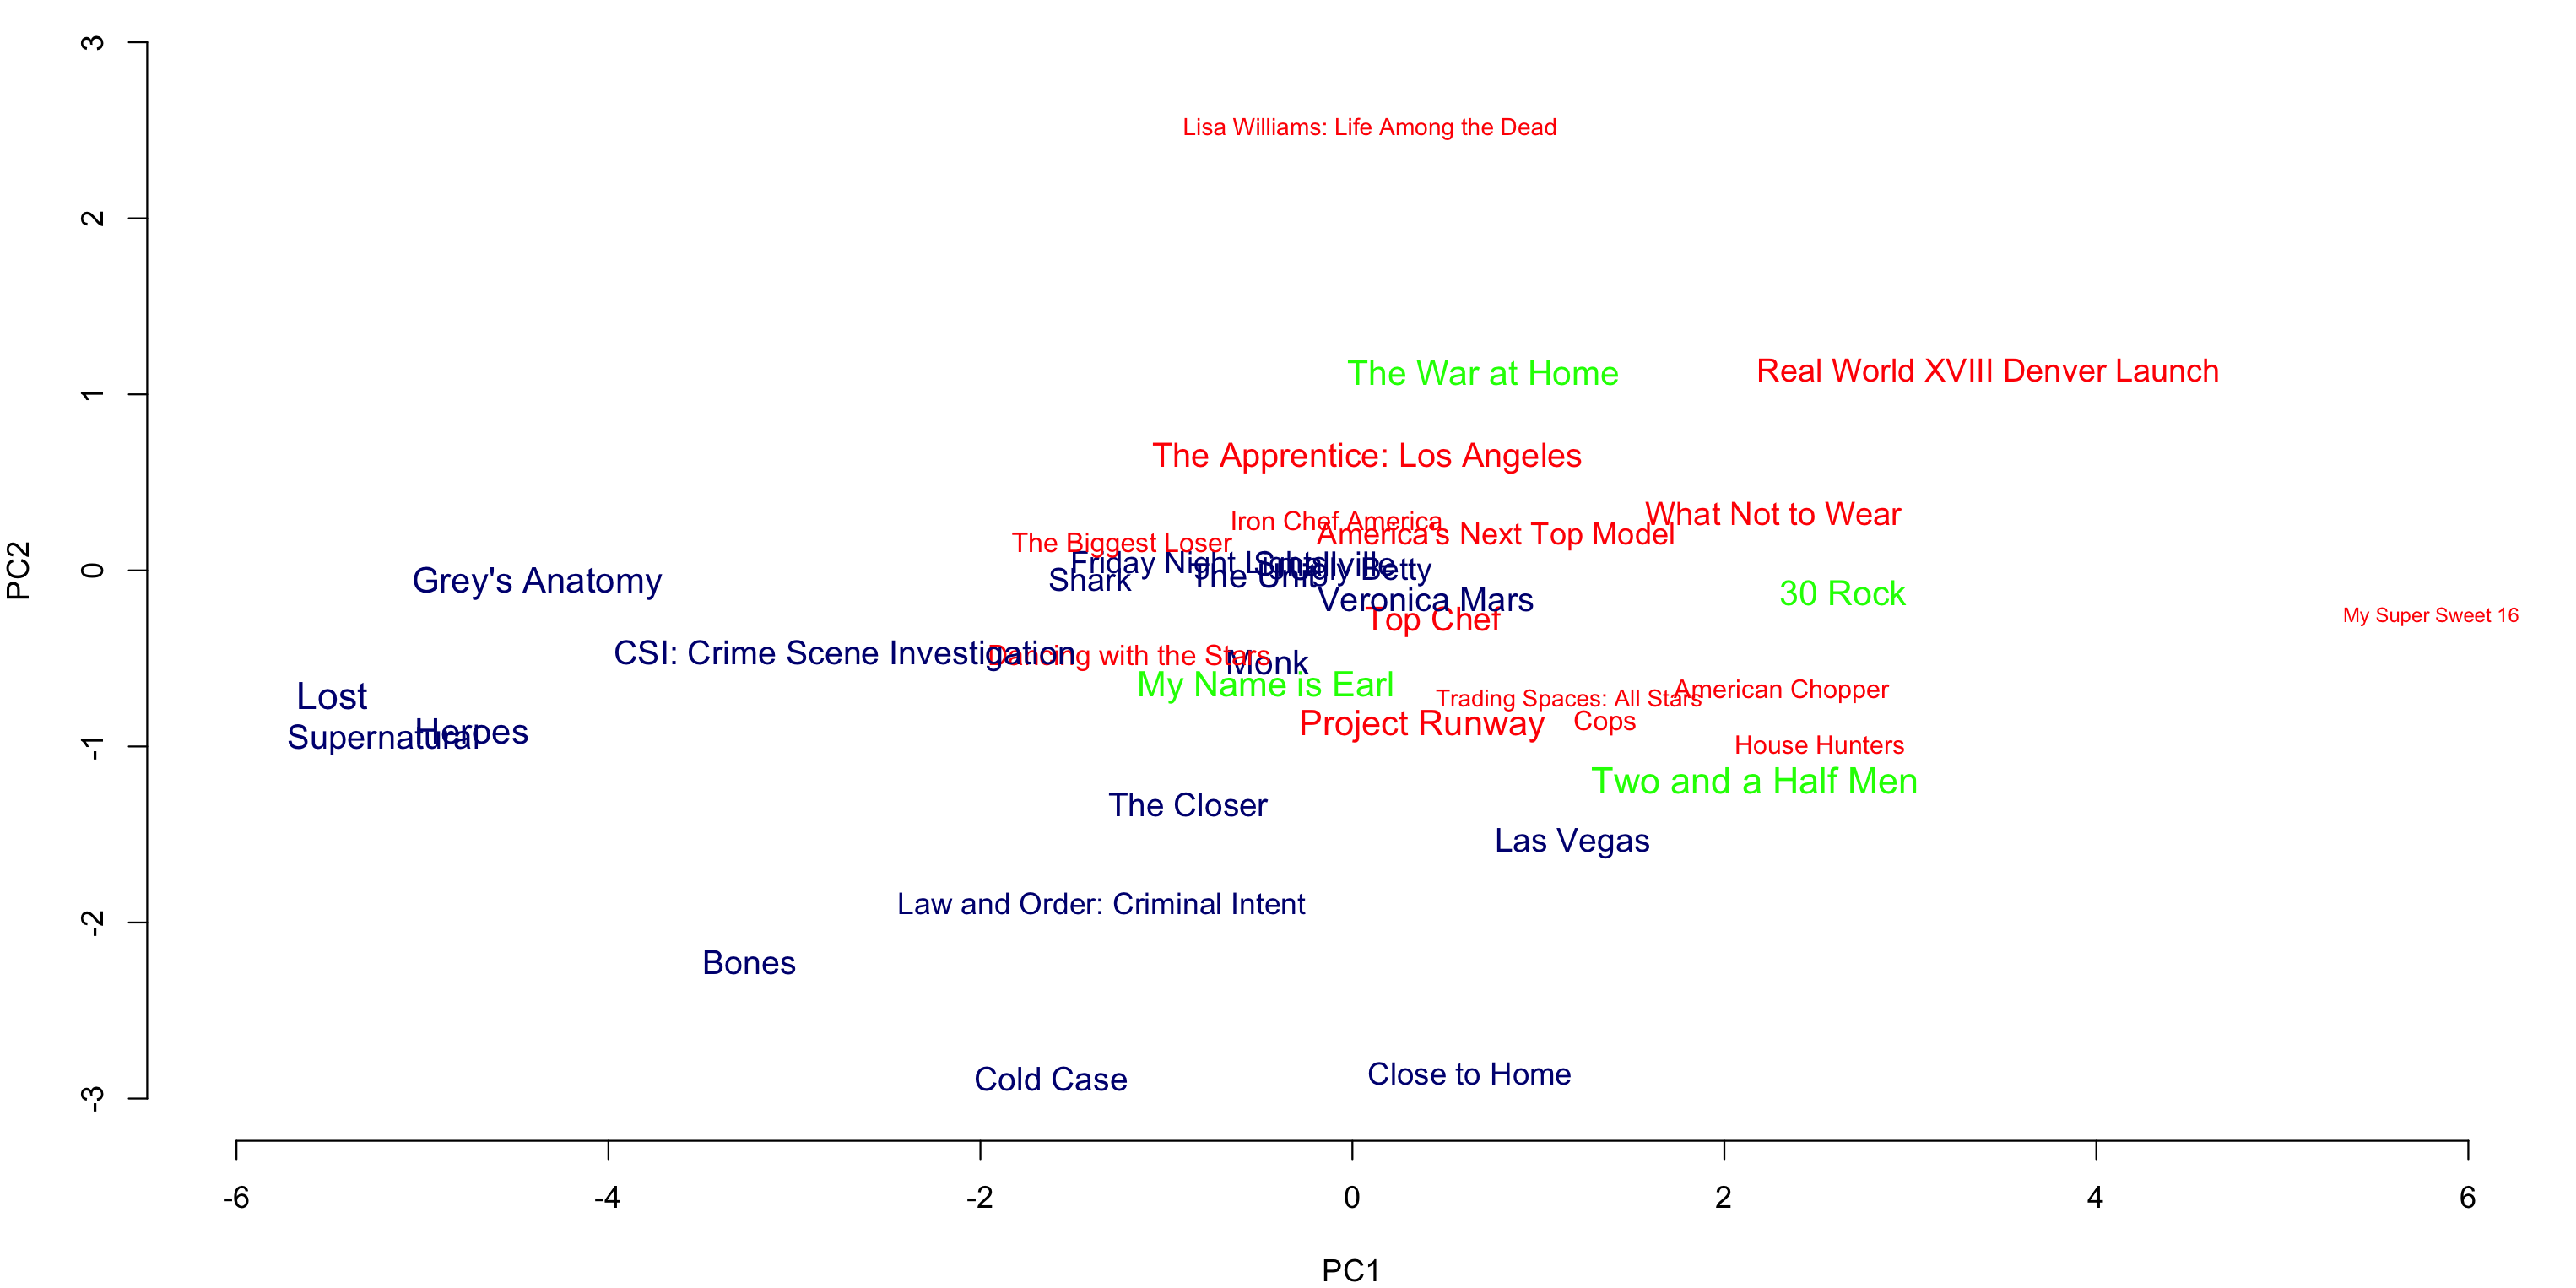

In [37]:
par(mai=c(.8,.8,0,.1))
plot(zpilot[,1:2], col=0, bty="n", # col=0 to get an empy plot
   ylim=c(-3,3), xlim=c(-6,6), # hides "monarch cove",living with ed", and "next" but these are all tiny 
    main="") 
text(zpilot[,1:2], labels=rownames(zpilot), 
    col=c("navy","red","green")[shows$Genre], # color by genre
    cex=shows$PE/mean(shows$PE)) # size by show

## Principal components regression

For the AICc or the eventual lasso, we'd need our trust companion:

In [38]:
library(gamlr)

Loading required package: Matrix



Among other data wrangling, also convert the PCs to a data frame so `glm` can keep track of names

In [39]:
PE <- shows$PE
zdf <- as.data.frame(zpilot)

Regress onto the first two PCs:

In [40]:
summary(PEglm <- glm(PE ~ ., data=zdf[,1:2]))


Call:
glm(formula = PE ~ ., data = zdf[, 1:2])

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-17.7970   -6.6583   -0.7242    6.7524   17.9895  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  72.6831     1.4370  50.580  < 2e-16 ***
PC1          -2.6401     0.5202  -5.075 1.12e-05 ***
PC2          -1.5029     0.6349  -2.367   0.0233 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 82.59648)

    Null deviance: 5646.5  on 39  degrees of freedom
Residual deviance: 3056.1  on 37  degrees of freedom
AIC: 294.96

Number of Fisher Scoring iterations: 2


Or fit on up to all factors with `glm`, only 1 up to 20:

In [41]:
kfits <- lapply(1:20, # do the below for K=1:20
	function(K) glm(PE~., data=zdf[,1:K,drop=FALSE]))

We can calculate the AICc for each fit with another flavor of `apply`, and see which model it likes best:

In [42]:
aicc <- sapply(kfits, AICc) # apply AICc to each fit
which.min(aicc) ## it likes 7 factors best

[1] 7

Or we can do the same with BIC:

In [43]:
bic <- sapply(kfits, BIC) 
which.min(bic) ## likes 3

[1] 3

We can also let the lasso pick the componests to keep:

In [44]:
lassoPCR <- gamlr(zpilot, PE)
B <- coef(lassoPCR)[-1,]
B[B!=0]
cvlassoPCR <- cv.gamlr(x=zpilot, y=PE, nfold=20) # nfold=20 for leave-two-out CV... 

PC1        PC2        PC3        PC7       PC11       PC16 
-2.1218211 -0.8704072 -1.2471668 -4.2554788 -0.5929234 13.0778161

So the lasso (here the default 1se criterioan) agrees with information criteria on the first 2 PCs but then grabs a couple extra ones:

In [45]:
coef(cvlassoPCR) 

21 x 1 sparse Matrix of class "dgCMatrix"
               seg26
intercept 72.6830750
PC1       -1.8148656
PC2       -0.4957926
PC3       -0.6532515
PC4        .        
PC5        .        
PC6        .        
PC7       -2.8522434
PC8        .        
PC9        .        
PC10       .        
PC11       .        
PC12       .        
PC13       .        
PC14       .        
PC15       .        
PC16       9.1264867
PC17       .        
PC18       .        
PC19       .        
PC20       .        

But if you plot the AICc for different Ks or lambdas, you see the models are much less stable.

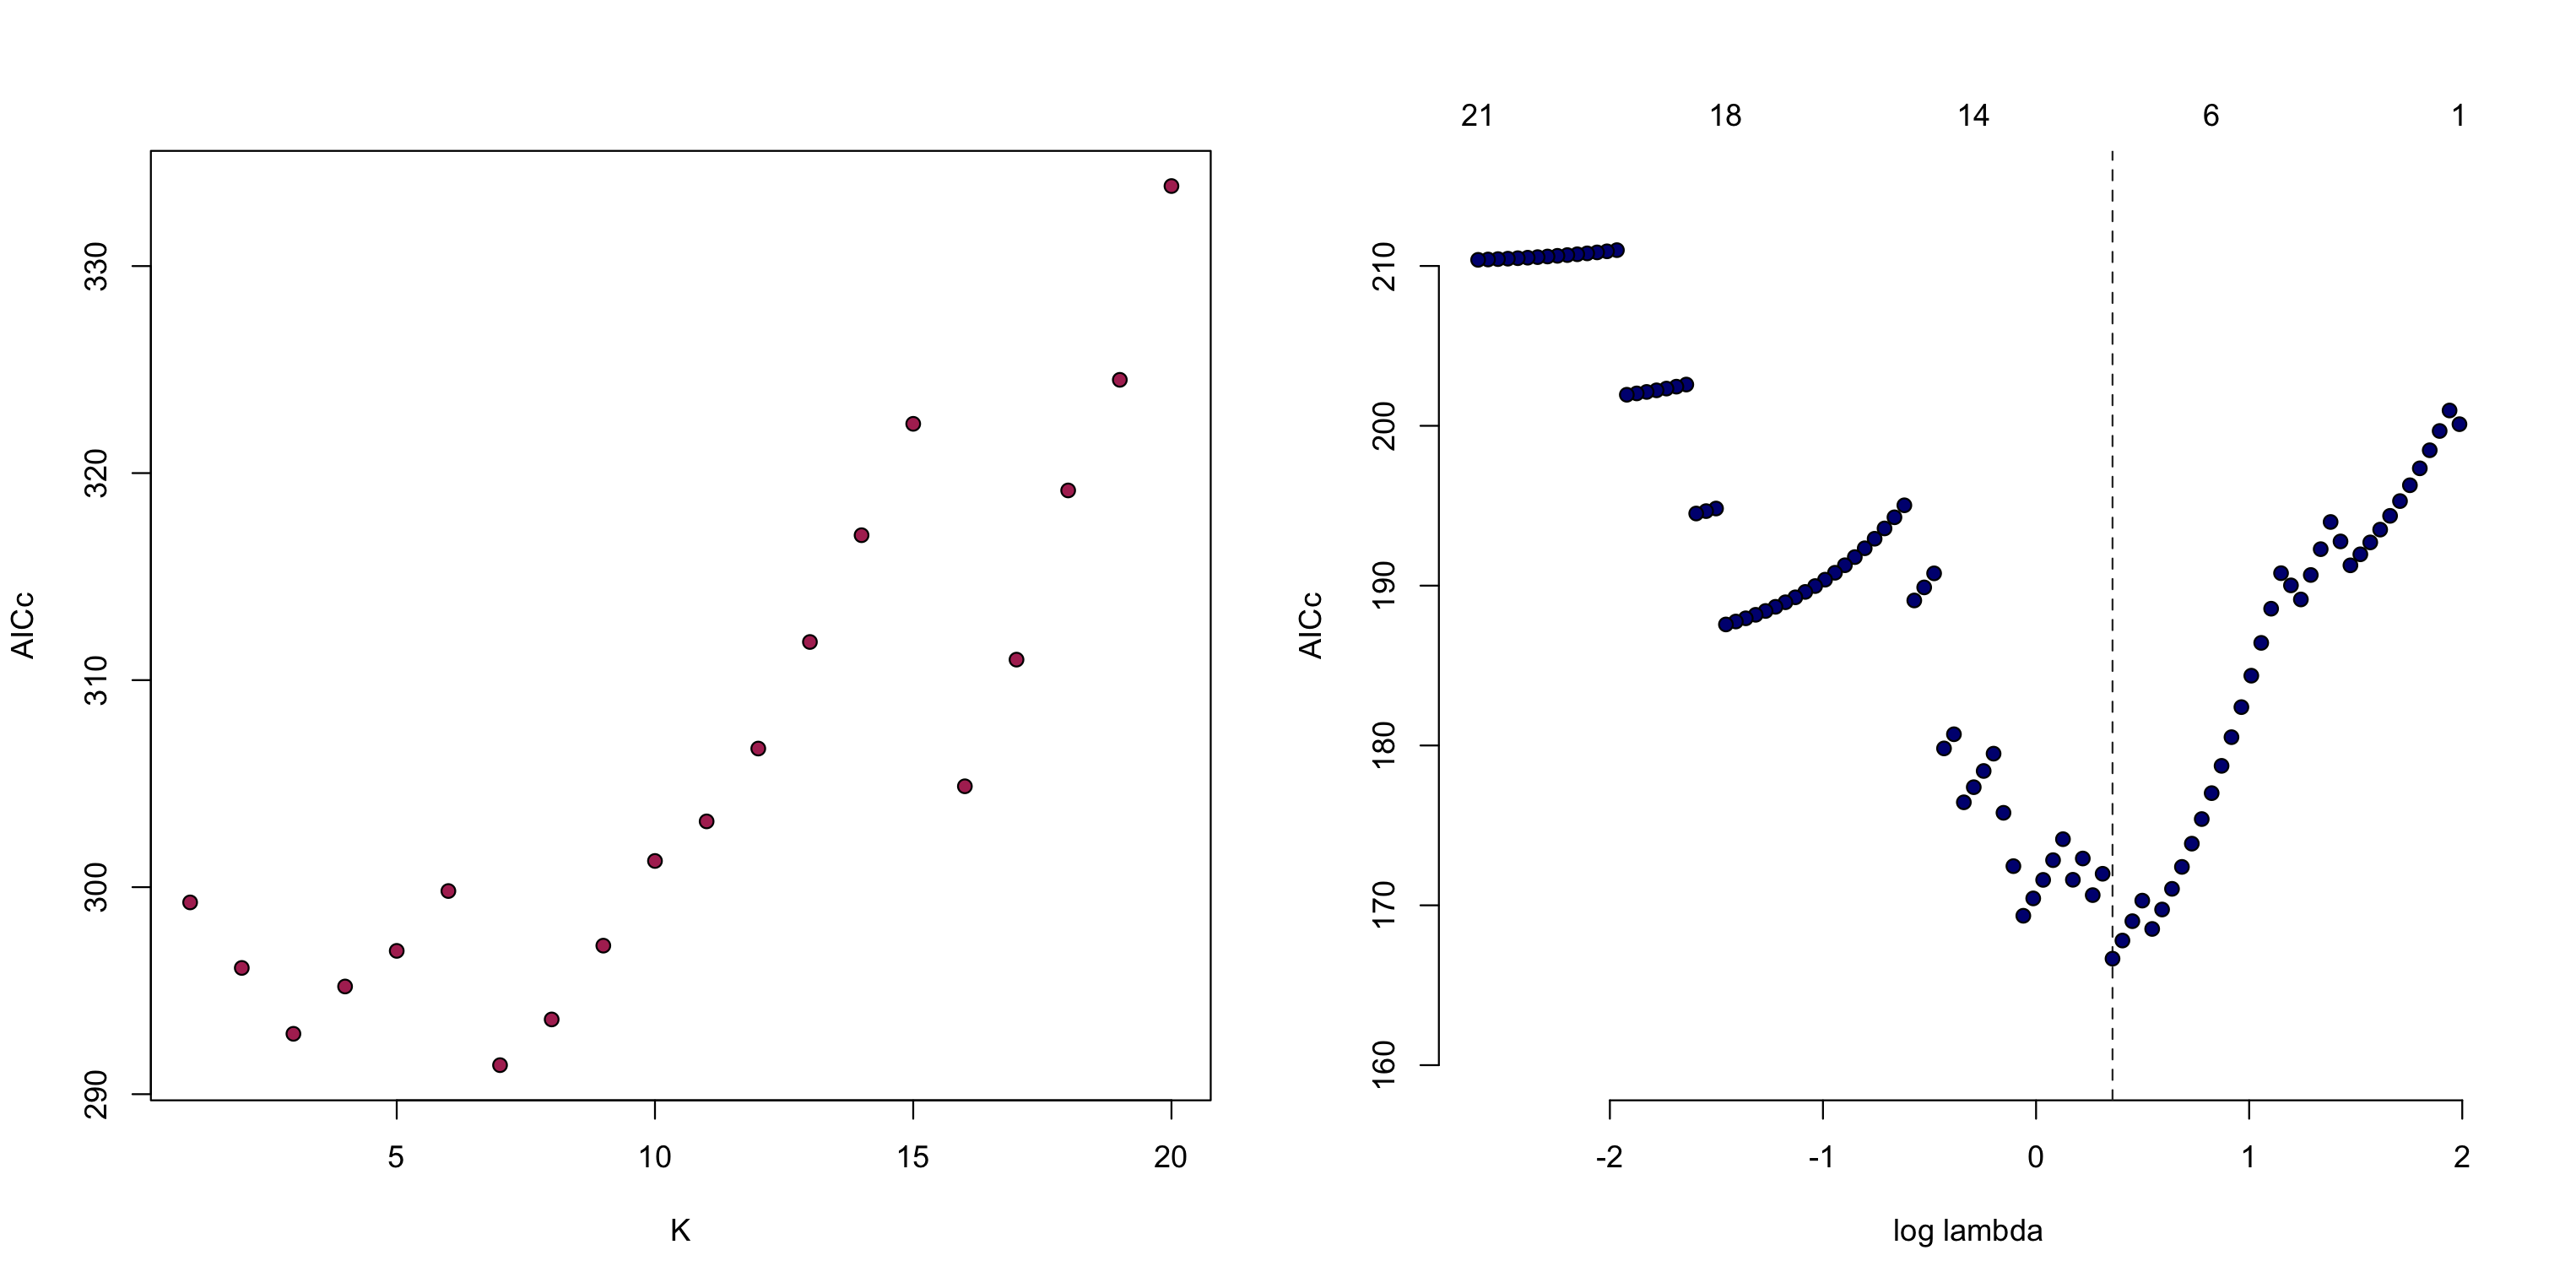

In [46]:
par(mfrow=c(1,2))
plot(aicc, pch=21, bg="maroon", xlab="K", ylab="AICc")
plot(lassoPCR, col=0, ylim=c(160,215), ylab="AICc")
points(log(lassoPCR$lambda), AICc(lassoPCR), pch=21, bg="navy")

You can do an un-factorized lasso for comparison:

In [47]:
cvlasso <- cv.gamlr(x=as.matrix(Xpilot), y=PE, nfold=20)

Or one that includes the raw data as well as the factors:

In [48]:
cvlassoboth <- cv.gamlr(x=as.matrix(cbind(Xpilot,zpilot)), y=PE, nfold=20)

If you plot the OOS performance of all three variants here, you see that factorized version performs best here, as there is simply too much noise in the raw data. This is common with redundant survey questions.

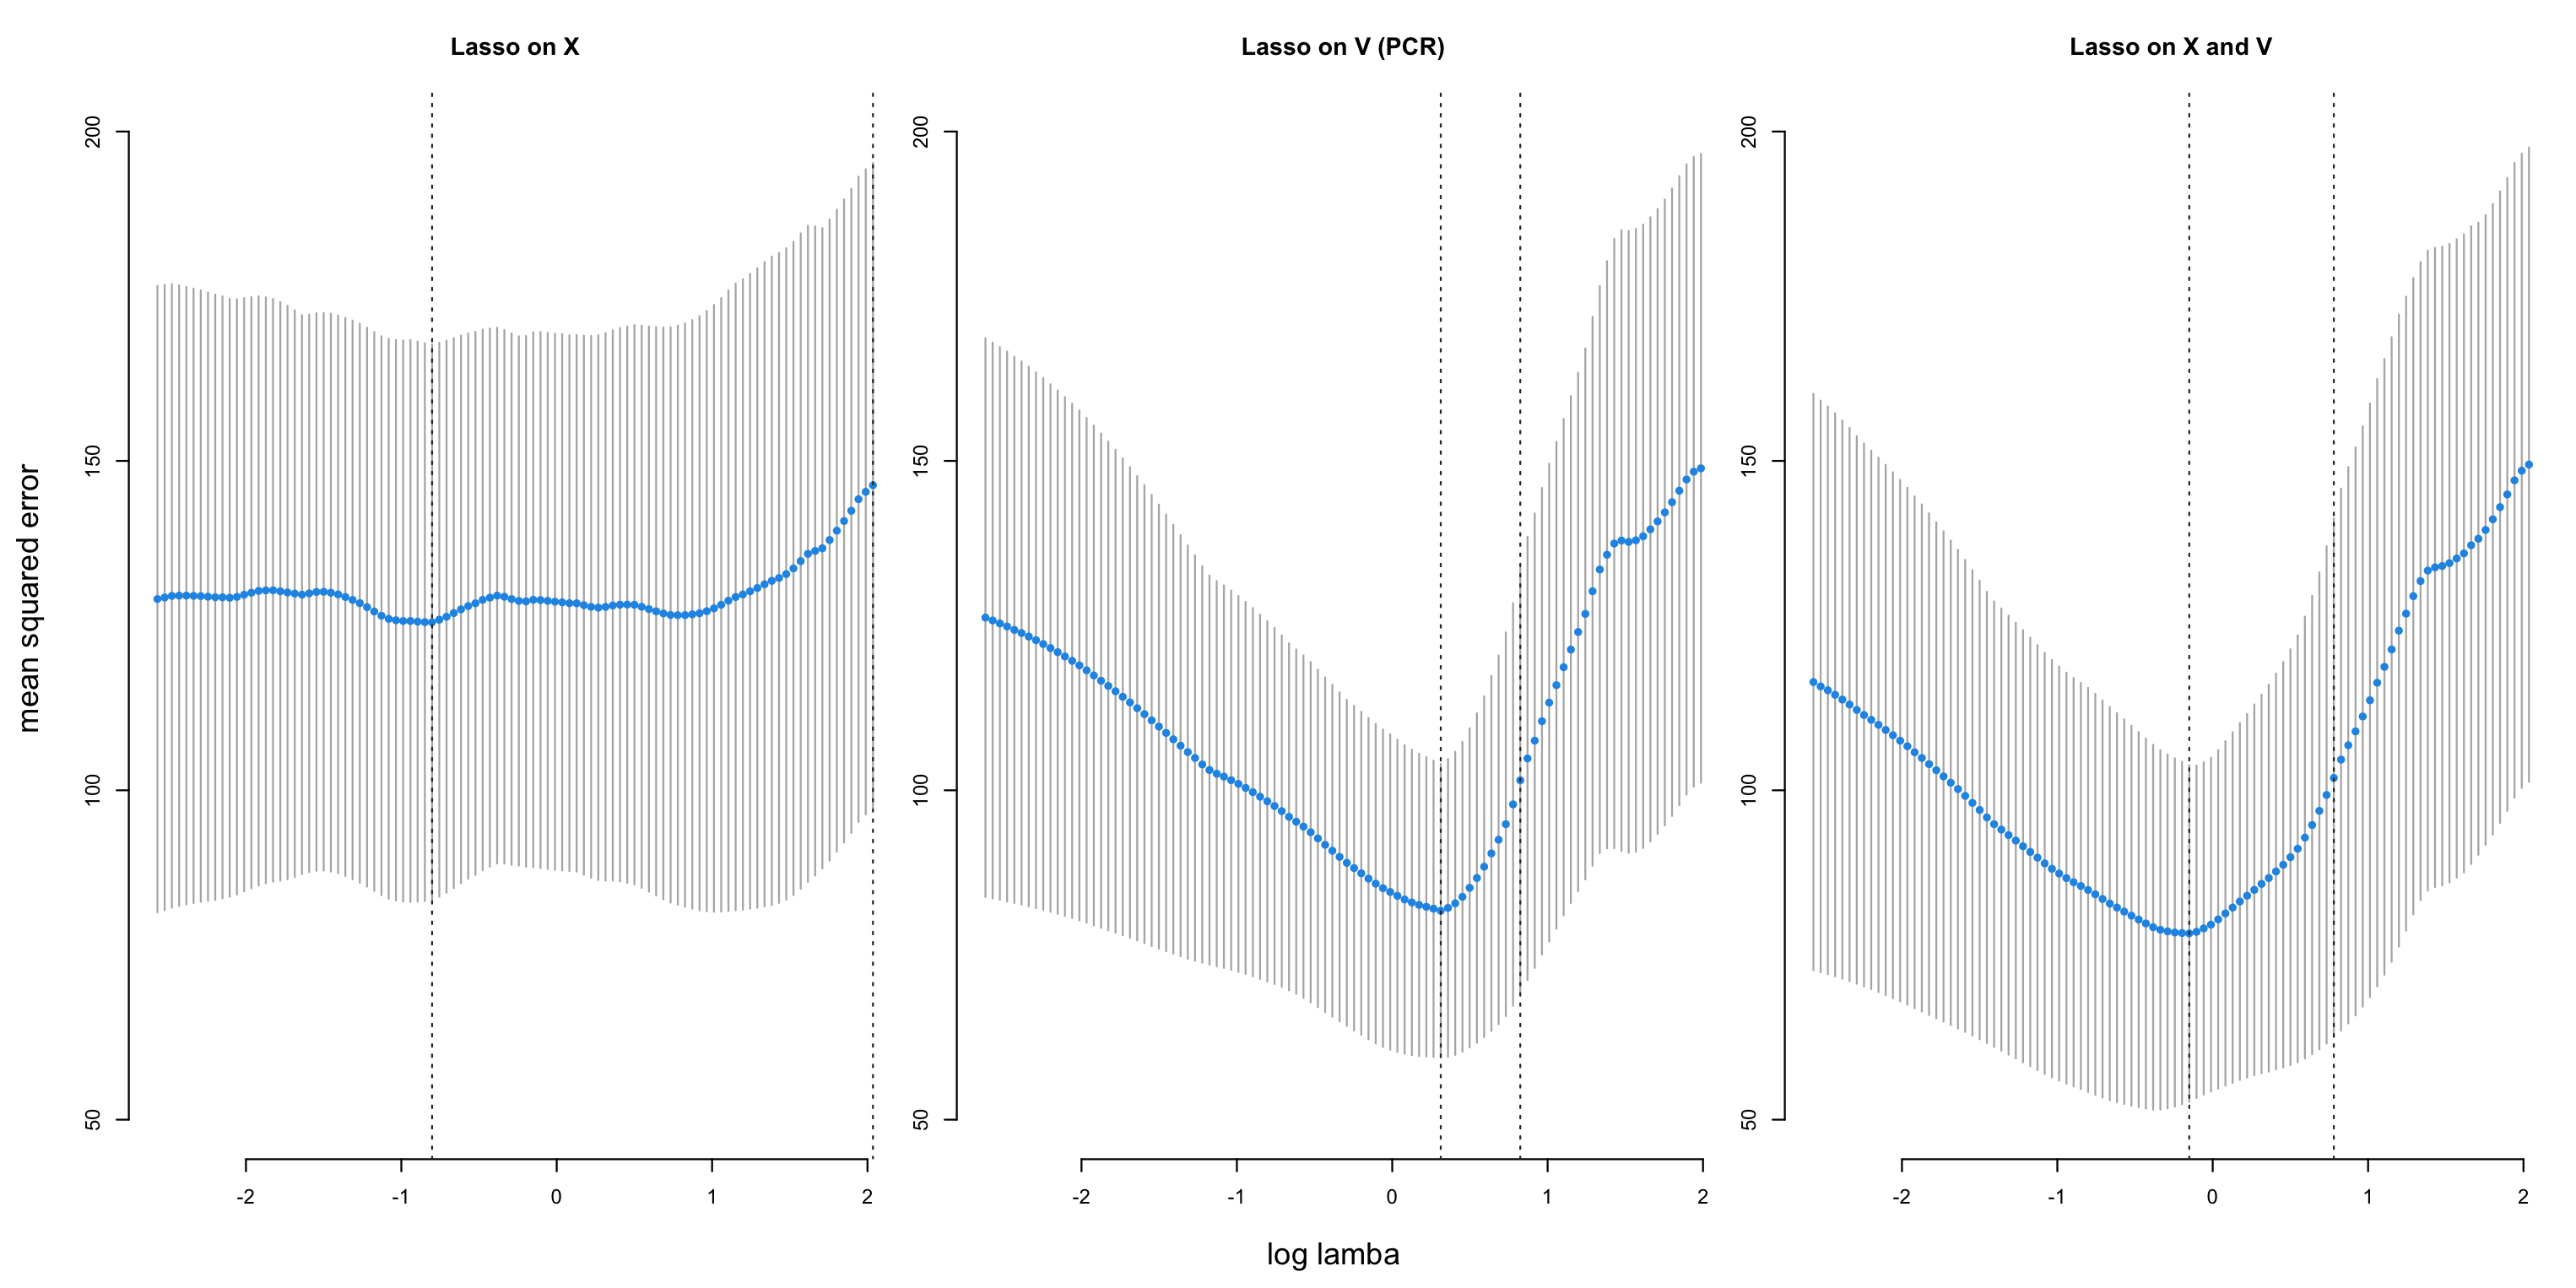

In [49]:
par(mfrow=c(1,3), mai=c(.2,.2,.5,.1), omi=c(.5,.5,0,0))
plot(cvlasso, main="Lasso on X", ylim=c(50,200), ylab="", xlab="", df=FALSE, bty="n")
plot(cvlassoPCR, main="Lasso on V (PCR)", ylim=c(50,200), ylab="", xlab="", df=FALSE, bty="n")
plot(cvlassoboth, main="Lasso on X and V", ylim=c(50,200), ylab="", xlab="", df=FALSE, bty="n")
mtext(side=2, "mean squared error", outer=TRUE, line=2)
mtext(side=1, "log lamba", outer=TRUE, line=2)

# Partial Least Squares on Gas Octane Data

In [50]:
gas <- read.csv("gasoline.csv")
octane <- gas[,1]
nir <- as.matrix(gas[,-1])

In [51]:
nm <- sapply(
	strsplit(substring(colnames(nir),2), ".", fixed=TRUE),
	function(v) as.numeric(v[1]))

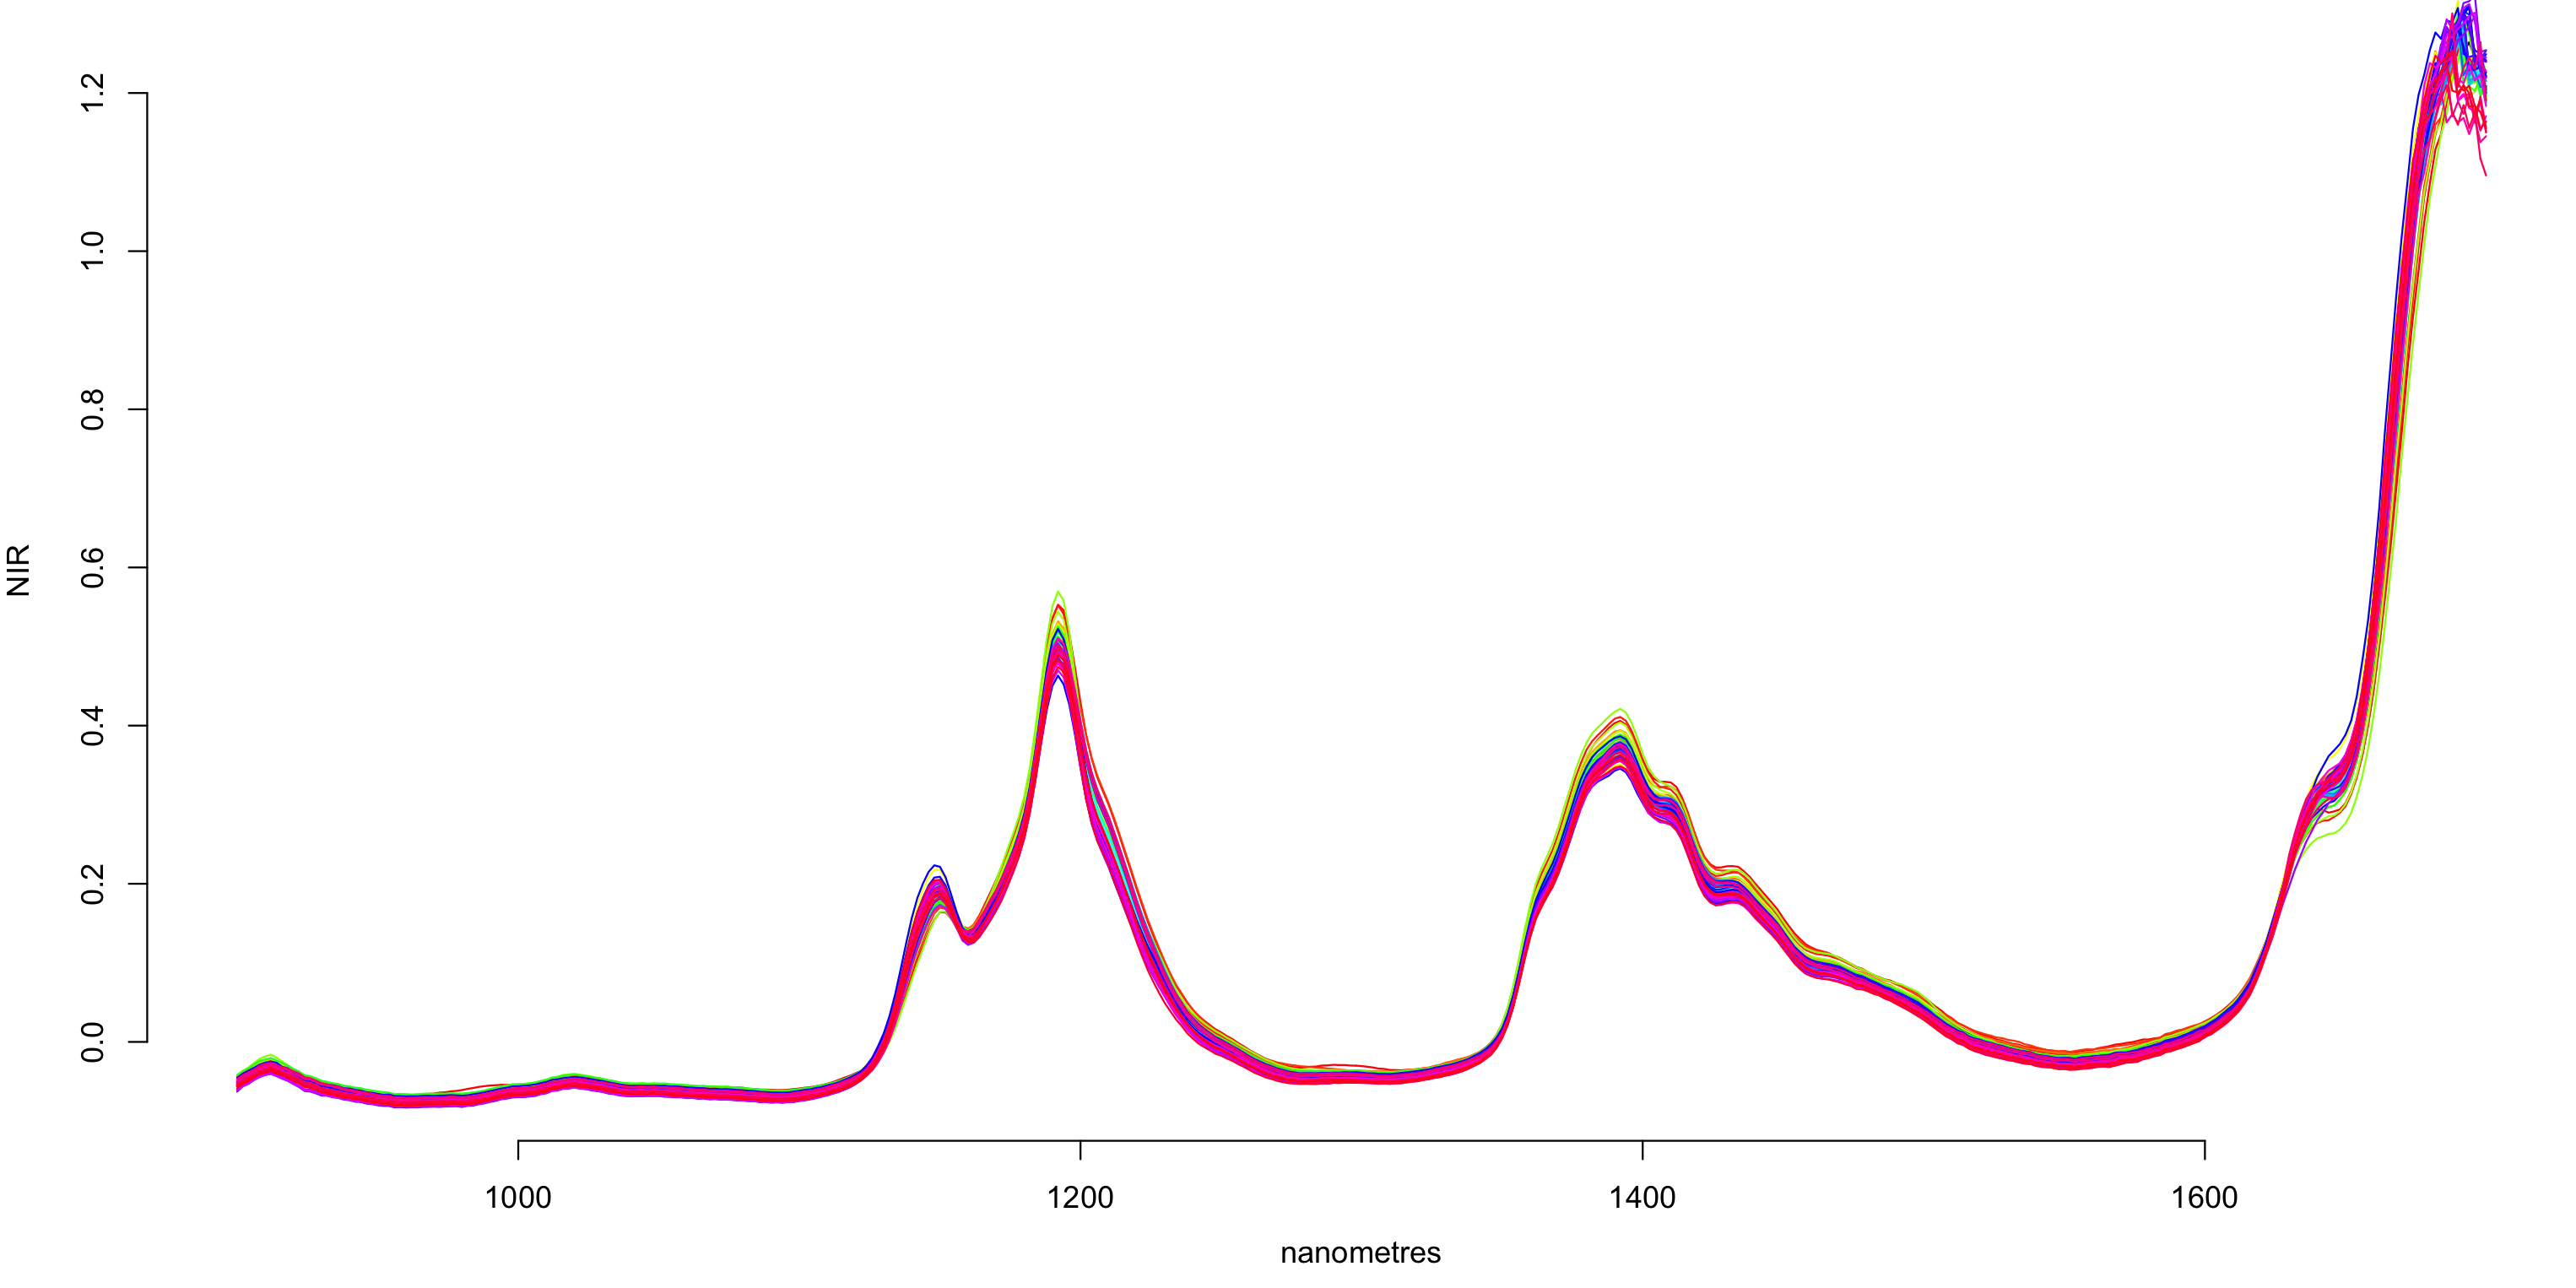

In [52]:
par(mai=c(.8,.8,0,0))
plot(nm, nir[1,], type='l', ylab='NIR', bty="n", xlab="")
for(i in 2:60) 
	lines(nm, nir[i,], col=rainbow(60)[i])
mtext(side=1, "nanometres", line=2.5)

## Marginal regression

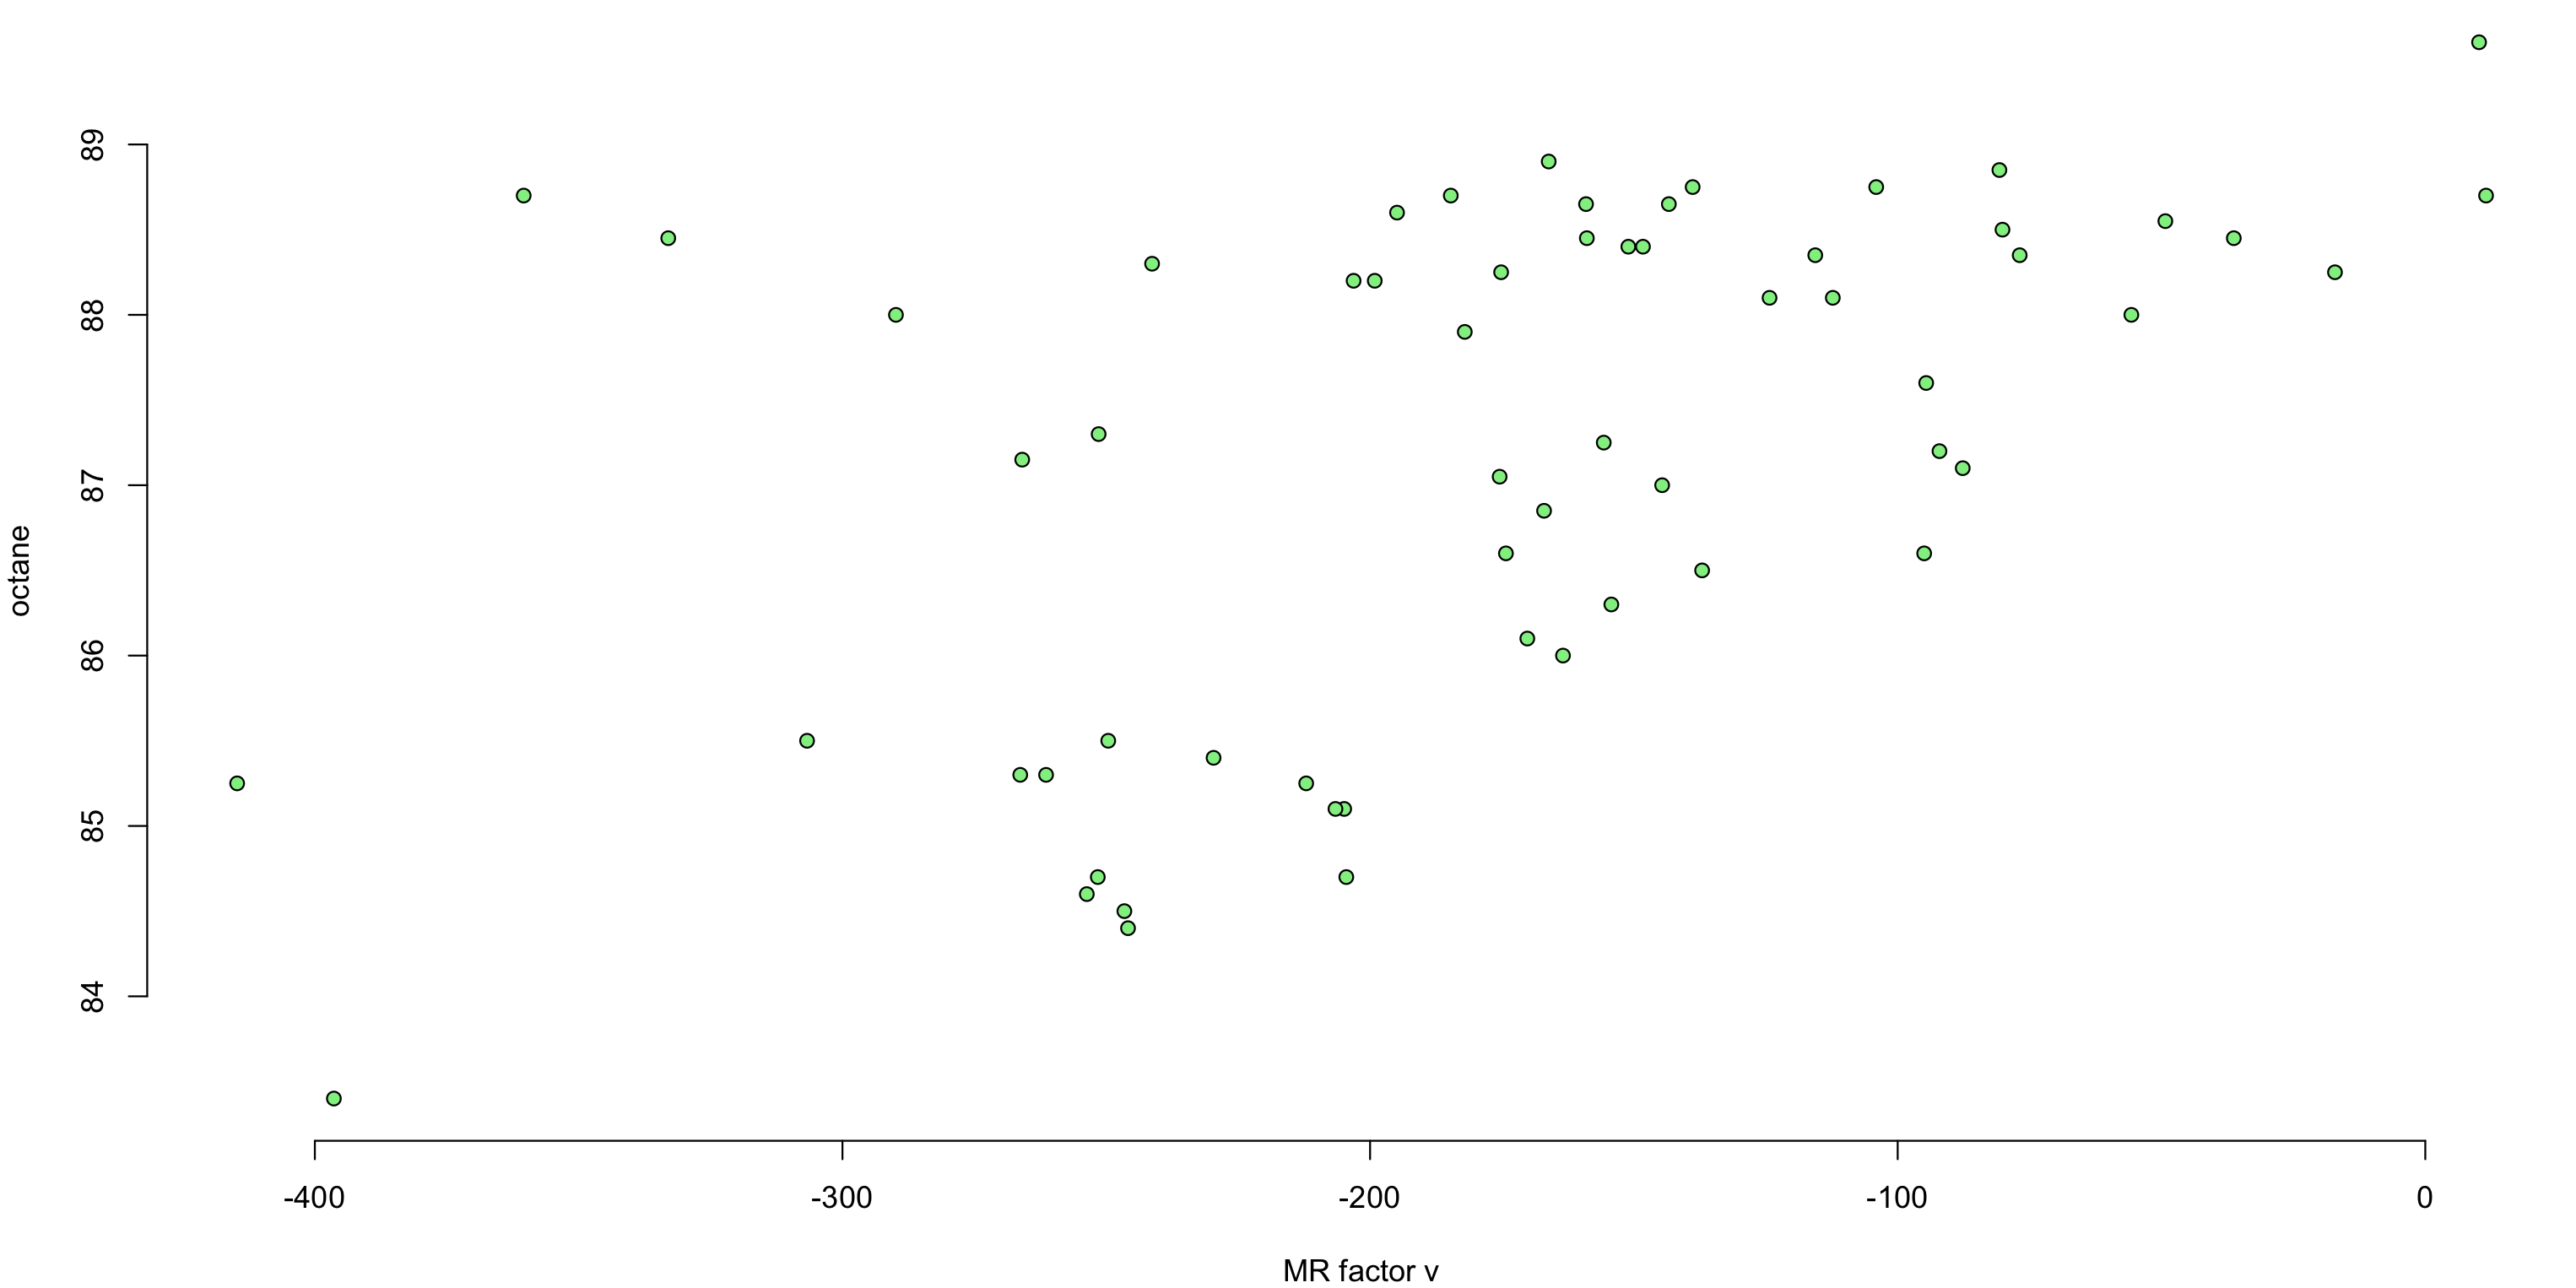

In [53]:
phi <- cor(nir, octane)/apply(nir,2,sd) 
v <- nir%*%phi
fwd <- glm(octane ~ v)

par(mai=c(.8,.8,.0,0))
plot(v, octane, pch=21, bg="lightgreen", bty="n", 
	xlab="MR factor v")

In [54]:
## Partial Least Squares

In [55]:
install.packages('textir')
library(textir)


The downloaded binary packages are in
	/var/folders/dk/2_0472cd7h35shgpvb9y6g6xp8980h/T//RtmpkElGwf/downloaded_packages


Loading required package: distrom

Loading required package: parallel



Directions 1, 2, 3, done.


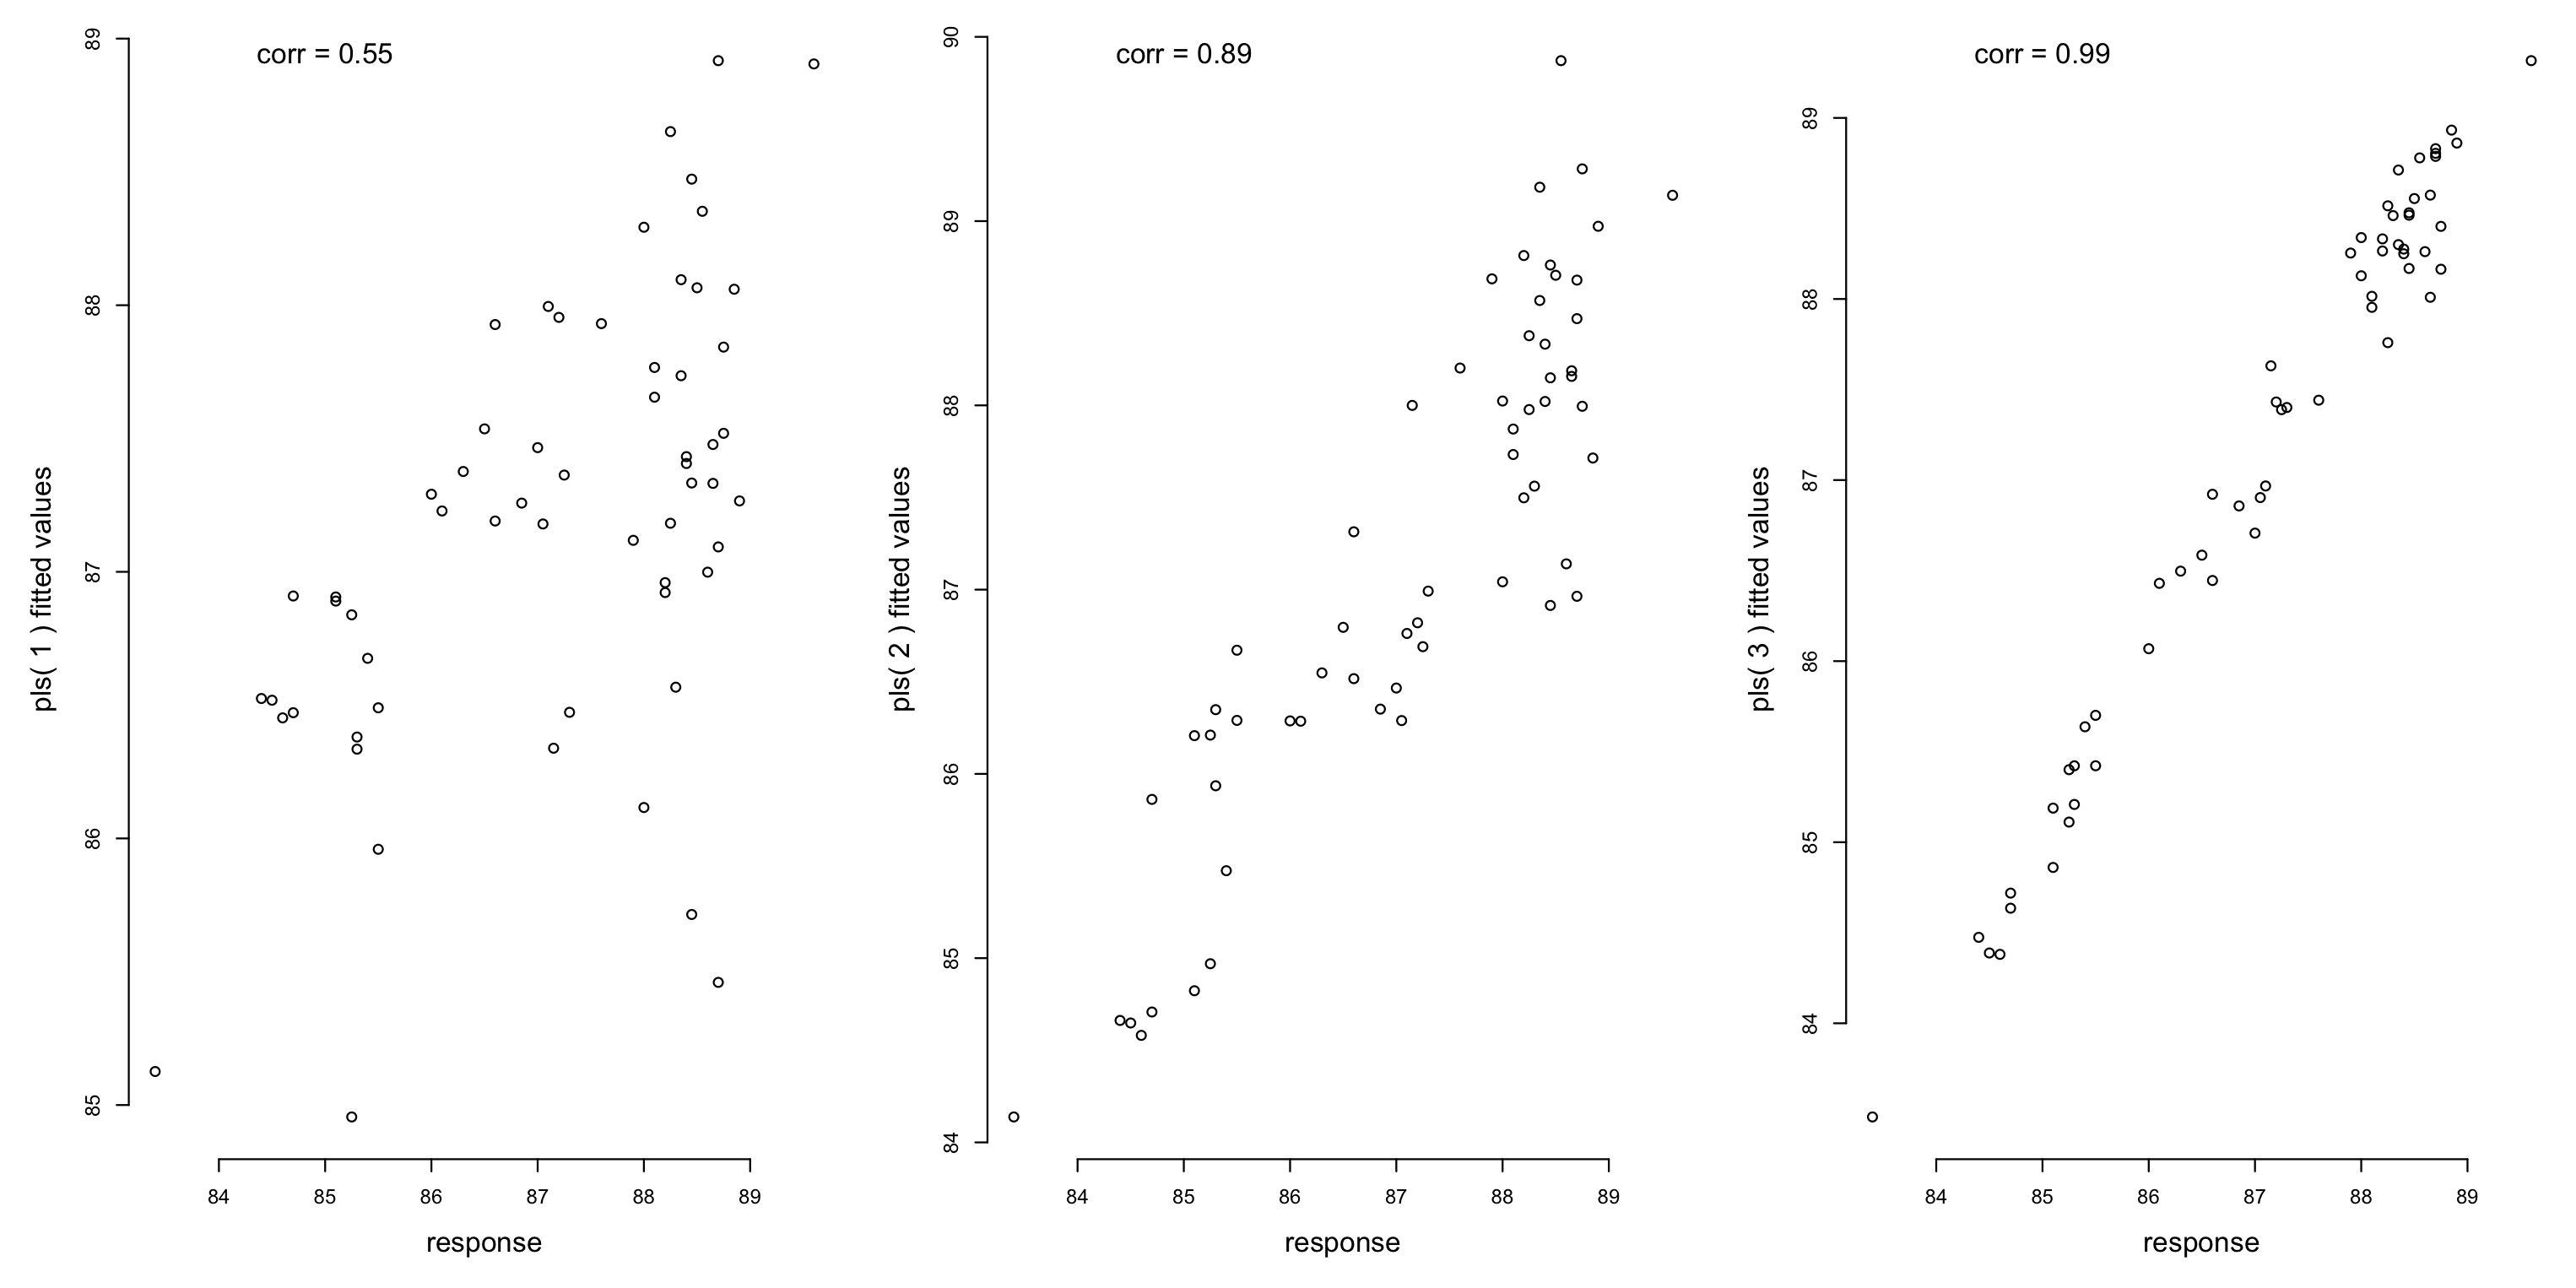

In [56]:
gaspls <- pls(x=nir, y=octane,  K=3)

par(mfrow=c(1,3), mai=c(.7,.7,.1,.1))
plot(gaspls, bty="n", cex.lab=1.4)

In [57]:
foldid <- rep(1:6,each=10)[sample(1:60)]
OOS <- matrix(nrow=6, ncol=10)
for(b in 1:6){
	print(b)
	for(k in 1:10){
		gpls <- pls(x=nir[foldid!=b,], y=octane[foldid!=b], K=k)
		OOS[b,k] <- 
			mean( (octane[foldid==b] - predict(gpls, nir[foldid==b,], K=k))^2 )
	}
}
cvm <- apply(OOS,2,mean)
cvs <- apply(OOS,2,sd)
OOS <- as.data.frame(OOS)
names(OOS) <- 1:10

[1] 1
Directions 1, done.
Directions 1, 2, done.
Directions 1, 2, 3, done.
Directions 1, 2, 3, 4, done.
Directions 1, 2, 3, 4, 5, done.
Directions 1, 2, 3, 4, 5, 6, done.
Directions 1, 2, 3, 4, 5, 6, 7, done.
Directions 1, 2, 3, 4, 5, 6, 7, 8, done.
Directions 1, 2, 3, 4, 5, 6, 7, 8, 9, done.
Directions 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, done.
[1] 2
Directions 1, done.
Directions 1, 2, done.
Directions 1, 2, 3, done.
Directions 1, 2, 3, 4, done.
Directions 1, 2, 3, 4, 5, done.
Directions 1, 2, 3, 4, 5, 6, done.
Directions 1, 2, 3, 4, 5, 6, 7, done.
Directions 1, 2, 3, 4, 5, 6, 7, 8, done.
Directions 1, 2, 3, 4, 5, 6, 7, 8, 9, done.
Directions 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, done.
[1] 3
Directions 1, done.
Directions 1, 2, done.
Directions 1, 2, 3, done.
Directions 1, 2, 3, 4, done.
Directions 1, 2, 3, 4, 5, done.
Directions 1, 2, 3, 4, 5, 6, done.
Directions 1, 2, 3, 4, 5, 6, 7, done.
Directions 1, 2, 3, 4, 5, 6, 7, 8, done.
Directions 1, 2, 3, 4, 5, 6, 7, 8, 9, done.
Directions 1, 2, 3, 4,

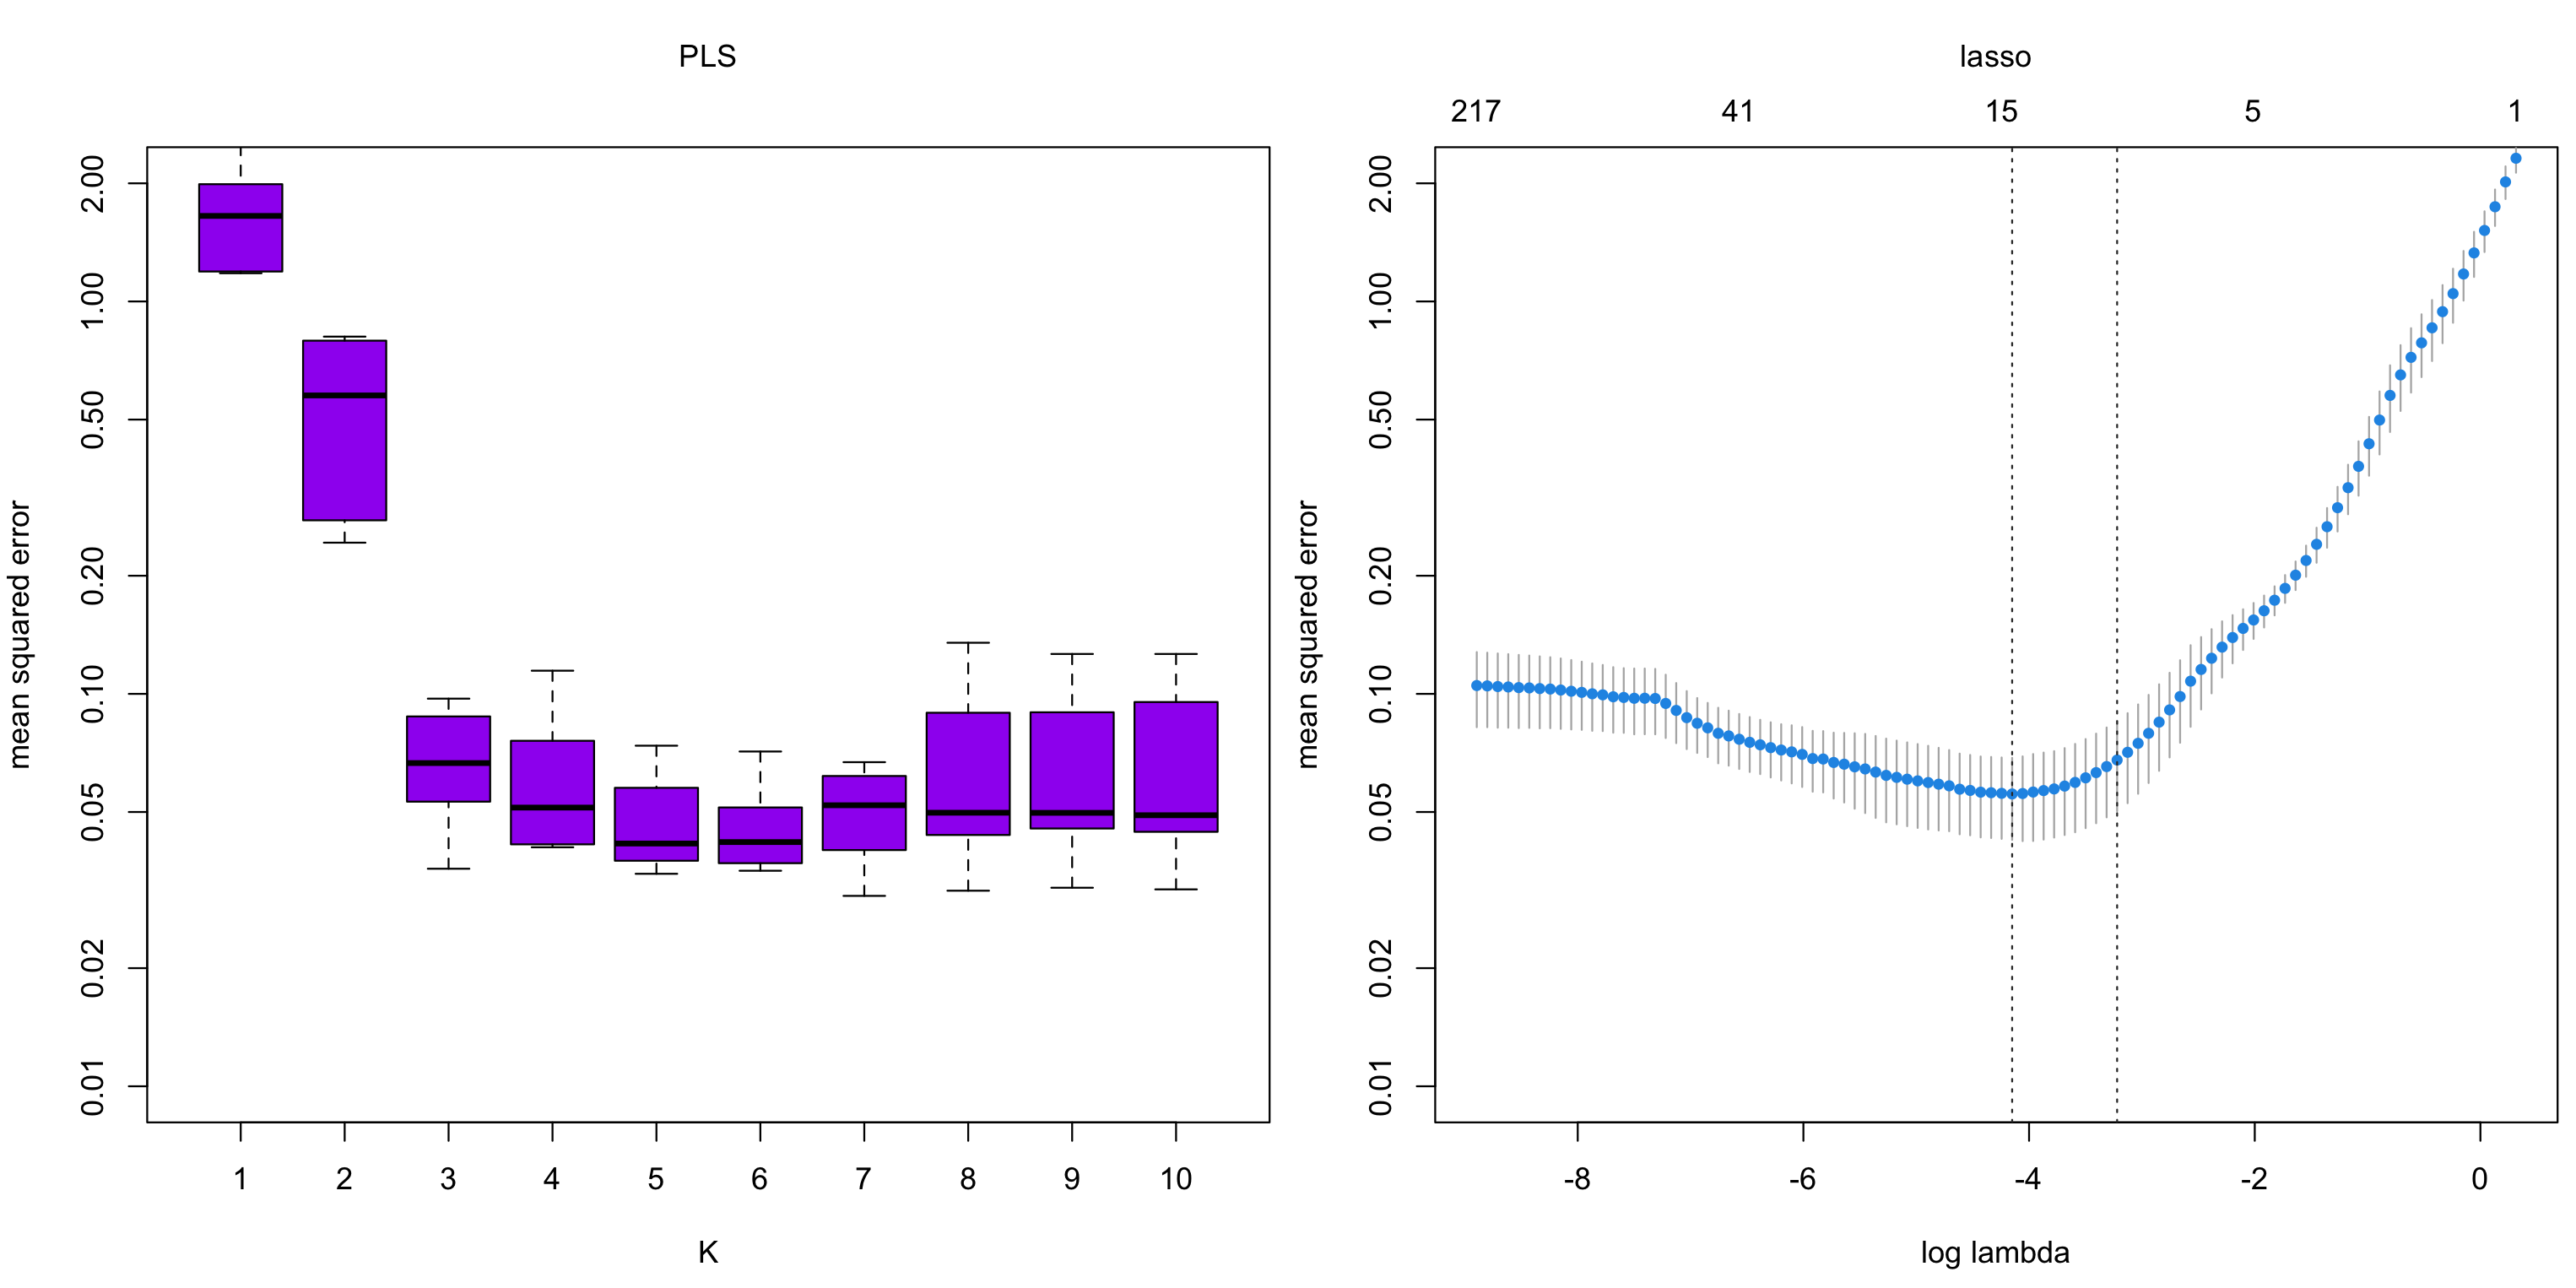

In [58]:
par(mfrow=c(1,2), mai=c(.9,.8,.8,.1))
boxplot(OOS, ylab="mean squared error", xlab="K", col="purple", log="y", main="", ylim=c(0.01,2))
mtext(side=3, "PLS", line=2)
gasgl <- cv.gamlr(x=nir, y=octane, lmr=1e-4)
plot(gasgl, log="y", main="", ylim=c(0.01,2)) 
mtext(side=3, "lasso", line=2)